<a href="https://colab.research.google.com/github/P-Saha/RSF-Diabetes-Prevention/blob/main/16_CHL5230_F23_FinalProjectV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

We will be using the CHL 5230 data set entiled Diabetes Study File 10K Dec 14 2017

In [ ]:
!python --version

Python 3.10.12


In [1]:
import random
random.seed(16)

# Import Libraries

In [2]:
!pip install --upgrade category_encoders #install this

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [3]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 15.3 MB/s eta 0:00:00


In [4]:
!pip install nltk

In [5]:
!pip install wordcloud

In [6]:
!pip install gensim

In [7]:
!pip install --upgrade pip
!pip uninstall --yes --quiet osqp
!pip install -U scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 834.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [8]:
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

In [9]:
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.preprocessing import OrdinalEncoder

import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times
from sklearn.inspection import permutation_importance
import statistics
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly.express as px

warnings.filterwarnings('ignore')

# Import Data

In [10]:
# Data Upload Options
user_choice = input("Specify user (Y, H, P): ")

if user_choice == 'Y':
    # Option I: Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    df_rsf = pd.read_excel("/content/drive/MyDrive/chl 5230/ml_final_project/Diabetes Study File 10K Dec 14 2017.xlsx") #Yacine file path for diabetes data
   # df_nlp = pd.read_csv("drive/MyDrive/ml_final_project/DiabetesDieaseTreatmentArticles_full.csv", encoding = "unicode_escape") #Yacine file path for research data
elif user_choice == 'H':
    from google.colab import drive
    drive.mount('/content/drive')
    df_rsf = pd.read_excel("drive/MyDrive/Diabetes Study File 10K Dec 14 2017.xlsx") #Hunter file path for diabetes data
    df_nlp = pd.read_csv("drive/MyDrive/DiabetesDieaseTreatmentArticles_full.csv", encoding = "unicode_escape") #Hunter file path for research data
elif user_choice == 'P':
    from google.colab import drive
    drive.mount('/content/drive')
    df_rsf = pd.read_csv('/content/drive/My Drive/') # Priyonto file path for diabetes data
    df_nlp = pd.read_csv('/content/drive/My Drive/') # Priyonto file path for research data
else:
    print("Invalid choice. Please specify user (Y, H, P) and try again.")

Specify user (Y, H, P): Y
Mounted at /content/drive


In [ ]:
from google.colab import drive
from google.colab import files
import io
drive.mount('/content/drive')
uploaded = files.upload()
df_rsf = pd.read_excel(io.BytesIO(uploaded['Diabetes Study File 10K Dec 14 2017.xlsx']))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Diabetes Study File 10K Dec 14 2017.xlsx to Diabetes Study File 10K Dec 14 2017 (1).xlsx


KeyError: 'Diabetes Study File 10K Dec 14 2017.xlsx'

# Understanding the Data

The following code will allow us to better understand the dataset and the type of features there are

In [11]:
print("min\\",df_rsf.min())
print("max\\",df_rsf.max())

TypeError: '<=' not supported between instances of 'float' and 'str'

In [ ]:
df_rsf.dtypes

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

In [ ]:
print(df_rsf.shape)
print(df_rsf.columns)
print(df_rsf.describe())
print(df_rsf.isnull().sum())

(10000, 43)
Index(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI', 'BMI_Date', 'LDL', 'LDL_Date',
       'HDL', 'HDL_Date', 'A1c', 'A1c_Date', 'TG', 'TG_Date', 'FBS',
       'FBS_Date', 'FBS>DM', 'Total_Cholesterol', 'Total_Cholesterol_Lab_Date',
       'Diabetes', 'DM_OnsetDate', 'Depression', 'Depression_OnsetDate', 'HTN',
       'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance', 'Sex',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES'],
      dtype='object')
        Age_at_Exam          sBP                    sBP_Date           BMI  \
count  10000.000000  9996.000000                       10000  10000.000000   
mean      63.197600   130.394358  2012-04-21 19:50:52.800000     30.415909   
min      

# Data Pre-Processesing

First make all `date` columns to pandas `datetype`

In [12]:
df_rsf[['sBP_Date', 'BMI_Date','LDL_Date','HDL_Date','A1c_Date','TG_Date','FBS_Date','Total_Cholesterol_Lab_Date','DM_OnsetDate','Depression_OnsetDate',
    'Hypertension_Medications_First_Instance','Corticosteroids_first_instance','DM_Onset_Revised','DM_Onset_Revised_1YrPrior']] = df_rsf[['sBP_Date', 'BMI_Date','LDL_Date','HDL_Date','A1c_Date','TG_Date','FBS_Date','Total_Cholesterol_Lab_Date','DM_OnsetDate','Depression_OnsetDate',
    'Hypertension_Medications_First_Instance','Corticosteroids_first_instance','DM_Onset_Revised','DM_Onset_Revised_1YrPrior']].astype('datetime64')

TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

In [13]:
df_rsf.dtypes

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

checking that comorbidities are pre dm diagnosis

In [16]:
result1 = df_rsf[['Depression_OnsetDate', 'HTN_OnsetDate', 'OA_OnsetDate','COPD_Date']].gt(df_rsf['DM_OnsetDate'], axis=0)
indices = result1.any(axis=1)
print(result1)
print(indices[indices].index)
post_long_df = df_rsf[indices]
post_long_df.head()

      Depression_OnsetDate  HTN_OnsetDate  OA_OnsetDate  COPD_Date
0                    False          False         False      False
1                    False          False         False      False
2                    False          False         False      False
3                    False          False         False      False
4                    False          False         False      False
...                    ...            ...           ...        ...
9995                 False          False         False      False
9996                 False          False         False      False
9997                 False           True          True      False
9998                 False          False         False      False
9999                 False          False          True      False

[10000 rows x 4 columns]
Index([4861, 4862, 4864, 4866, 4868, 4869, 4872, 4873, 4875, 4876,
       ...
       9981, 9982, 9983, 9984, 9989, 9991, 9992, 9994, 9997, 9999],
      dtype='int64', len

Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date  \
4861           54  135.0 2013-05-30  39.000000 2013-05-30  2.85 2013-08-26   
4862           84  126.0 2015-02-10  38.916656 2015-01-19  1.56 2015-02-05   
4864           70  140.0 2013-09-17  34.547347 2013-10-03  2.36 2013-10-01   
4866           60  140.0 2014-11-24  33.163265 2014-10-29  3.59 2014-10-30   
4868           64  147.0 2014-03-04  36.225454 2014-03-04  2.22 2014-02-24   

       HDL   HDL_Date  A1c  ... leastO(A1c_Date)  leastO(DM_OnsetDate)  \
4861  1.10 2013-08-26  8.3  ...          42071.0               41424.0   
4862  1.29 2015-02-05  6.5  ...          41873.0               41402.0   
4864  1.06 2013-10-01  7.3  ...          41753.0               41450.0   
4866  1.22 2014-10-30  6.9  ...          41676.0               41409.0   
4868  1.43 2014-02-24  7.6  ...          41878.0               41509.0   

     leastO(FBS_Date)  LeastOfAll A1C_BEF_DM  FBS_BEF_DM        Patient_ID  \
4861          42071.0     41424.0      False       False  4001000000256851   
4862          41873.0     41402.0      False       False  4001000000256245   
4864          41753.0     41450.0      False       False  4001000000256158   
4866          41676.0     41409.0      False       False  4001000000256805   
4868          41694.0     41509.0      False       False  4001000000256466   

     DM_Onset_Revised  DM_Onset_Revised_1YrPrior DIABETES  
4861       2013-05-23                 2012-05-23      Yes  
4862       2013-05-01                 2012-05-01      Yes  
4864       2013-06-18                 2012-06-18      Yes  
4866       2013-05-08                 2012-05-08      Yes  
4868       2013-08-16                 2012-08-16      Yes  

[5 rows x 43 columns]

In [17]:
#post_long_df.to_csv("filtered_dates.csv", index=False)

Since the random survival forest and random forest take different values, the will be named differently\
\
`df_s` will be the dataframe for the random survival forest\
`df` will be the dataframe for the random forest

In [18]:
df = df_rsf
df_s = df_rsf

Add survival times

In [19]:
df_s['DM_OnsetDate'] = df_s['DM_OnsetDate'].replace(pd.NaT, pd.Timestamp(df_s['DM_OnsetDate'].max()))

In [20]:
dates = ['sBP_Date', 'BMI_Date','LDL_Date','HDL_Date','A1c_Date','TG_Date','FBS_Date','Total_Cholesterol_Lab_Date']#,'Depression_OnsetDate','Hypertension_Medications_First_Instance','Corticosteroids_first_instance'
df_s['start_date'] = df_s[dates].min(axis = 1)
df_s['end_date'] = df_s['DM_OnsetDate']

df_s['DM_survival_time'] = df_s['end_date'] - df_s['start_date']
df_s['DM_survival_int'] = df_s['DM_survival_time'].dt.days

In [21]:
df_s.head()

Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           65  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1           62  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2           63  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3           51  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4           40  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   

    HDL_Date  A1c  ... A1C_BEF_DM  FBS_BEF_DM        Patient_ID  \
0 2013-06-14  5.4  ...        NaN         NaN  4001000000255903   
1 2014-05-28  5.8  ...        NaN         NaN  4001000000256456   
2        NaT  6.1  ...        NaN         NaN  1001000000000054   
3 2014-01-14  6.0  ...        NaN         NaN  4001000000259496   
4 2015-06-24  5.8  ...        NaN         NaN  4001000000262094   

   DM_Onset_Revised DM_Onset_Revised_1YrPrior  DIABETES  start_date  \
0               NaT                       NaT        No  2013-06-11   
1               NaT                       NaT        No  2014-05-28   
2               NaT                       NaT        No  2011-12-01   
3               NaT                       NaT        No  2014-01-06   
4               NaT                       NaT        No  2015-06-12   

    end_date  DM_survival_time DM_survival_int  
0 2015-06-30          749 days             749  
1 2015-06-30          398 days             398  
2 2015-06-30         1307 days            1307  
3 2015-06-30          540 days             540  
4 2015-06-30           18 days              18  

[5 rows x 47 columns]

In [22]:
ogdf = df

ogdf.head()

Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           65  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1           62  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2           63  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3           51  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4           40  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   

    HDL_Date  A1c  ... A1C_BEF_DM  FBS_BEF_DM        Patient_ID  \
0 2013-06-14  5.4  ...        NaN         NaN  4001000000255903   
1 2014-05-28  5.8  ...        NaN         NaN  4001000000256456   
2        NaT  6.1  ...        NaN         NaN  1001000000000054   
3 2014-01-14  6.0  ...        NaN         NaN  4001000000259496   
4 2015-06-24  5.8  ...        NaN         NaN  4001000000262094   

   DM_Onset_Revised DM_Onset_Revised_1YrPrior  DIABETES  start_date  \
0               NaT                       NaT        No  2013-06-11   
1               NaT                       NaT        No  2014-05-28   
2               NaT                       NaT        No  2011-12-01   
3               NaT                       NaT        No  2014-01-06   
4               NaT                       NaT        No  2015-06-12   

    end_date  DM_survival_time DM_survival_int  
0 2015-06-30          749 days             749  
1 2015-06-30          398 days             398  
2 2015-06-30         1307 days            1307  
3 2015-06-30          540 days             540  
4 2015-06-30           18 days              18  

[5 rows x 47 columns]

In [23]:
dropped_columns = ['sBP_Date', 'BMI_Date', 'LDL_Date',
        'HDL_Date',  'A1c_Date',  'TG_Date',
       'FBS_Date', 'FBS>DM',  'Total_Cholesterol_Lab_Date',
       'DIABETES', 'DM_OnsetDate', 'Depression_OnsetDate',
       'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'start_date', 'end_date', 'DM_survival_time', 'DM_survival_int']

df = df.drop(columns=dropped_columns, axis=1)
df['Sex'] = df['Sex'].replace({'Female' : 0, 'Male': 1})
df.head()

Age_at_Exam    sBP        BMI   LDL   HDL  A1c    TG  FBS  \
0           65  126.0  31.000000  1.66  1.11  5.4  2.28  5.8   
1           62  135.0  25.846483  2.49  1.37  5.8  1.37  5.4   
2           63  133.0  30.900000  1.65   NaN  6.1  0.76  5.6   
3           51  136.0  56.710775  2.80  1.94  6.0  0.99  6.0   
4           40  123.0  33.067867  2.48  1.17  5.8  1.04  5.2   

   Total_Cholesterol  Diabetes  Depression  HTN  OA  COPD  Sex  
0               3.81         0           0    0   0     0    0  
1               4.48         0           0    1   0     0    0  
2                NaN         0           0    1   0     1    1  
3               5.19         0           0    0   0     0    0  
4               4.12         0           1    0   0     0    0

In [25]:
print(df.shape)

(10000, 15)


In [24]:
keep_col = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol', 'Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex', 'DM_survival_int']
keep_col_p = ['Patient_ID', 'Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol', 'Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex', 'DM_survival_int']

df_s['Sex'] = df_s['Sex'].replace({'Female' : 0, 'Male': 1})
df_s['Diabetes'] = df_s['Diabetes'].replace({0 : False, 1: True})
df_s = df_s[df_s['DM_survival_int'] >= 0]

df_s_p = df_s[keep_col_p]
df_s = df_s[keep_col]
df_s_p.head()

Patient_ID  Age_at_Exam    sBP        BMI   LDL   HDL  A1c    TG  \
0  4001000000255903           65  126.0  31.000000  1.66  1.11  5.4  2.28   
1  4001000000256456           62  135.0  25.846483  2.49  1.37  5.8  1.37   
2  1001000000000054           63  133.0  30.900000  1.65   NaN  6.1  0.76   
3  4001000000259496           51  136.0  56.710775  2.80  1.94  6.0  0.99   
4  4001000000262094           40  123.0  33.067867  2.48  1.17  5.8  1.04   

   FBS  Total_Cholesterol  Diabetes  Depression  HTN  OA  COPD  Sex  \
0  5.8               3.81     False           0    0   0     0    0   
1  5.4               4.48     False           0    1   0     0    0   
2  5.6                NaN     False           0    1   0     1    1   
3  6.0               5.19     False           0    0   0     0    0   
4  5.2               4.12     False           1    0   0     0    0   

   DM_survival_int  
0              749  
1              398  
2             1307  
3              540  
4               18

In [26]:
print(df_s_p.shape)

(5897, 17)


In [27]:
df_s_p['Patient_ID'].value_counts().sort_values(ascending = False)

Patient_ID
8001000805024396    7
4001000000014245    7
4001000000131267    6
8001000805024544    6
8001000805027684    6
                   ..
1003000000214771    1
1002000000080022    1
1002000000011330    1
1002000000038827    1
1003000000069023    1
Name: count, Length: 5374, dtype: int64

# Data Visualization

In [ ]:
print(df_rsf.columns)
print(df_rsf.dtypes)
print(df_rsf.describe())

Index(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI', 'BMI_Date', 'LDL', 'LDL_Date',
       'HDL', 'HDL_Date', 'A1c', 'A1c_Date', 'TG', 'TG_Date', 'FBS',
       'FBS_Date', 'FBS>DM', 'Total_Cholesterol', 'Total_Cholesterol_Lab_Date',
       'Diabetes', 'DM_OnsetDate', 'Depression', 'Depression_OnsetDate', 'HTN',
       'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance', 'Sex',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES',
       'start_date', 'end_date', 'DM_survival_time', 'DM_survival_int'],
      dtype='object')
Age_at_Exam                                          int64
sBP                                                float64
sBP_Date                                    datetime64[ns]
BMI   

In [ ]:
diagnosis = ['Diabetes', 'Depression', 'OA', 'HTN', 'COPD']

categorical_columns = "Diabetes"
target_column = "Diabetes"
numerical_columns = ['sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol']

In [ ]:
dfDiag = ogdf.drop(columns=np.setdiff1d(dropped_columns, diagnosis), axis=1, inplace=False)

In [ ]:
# Create an interactive box plot for the 'Age' feature
for j in diagnosis:
  for i in numerical_columns:
    fig_box = px.box(dfDiag, x=j,y = i, title='Box Plot of biomarker by '+j, color=j, color_discrete_sequence=['#0d7b94', '#82153d'])

  # Customizing the layout and theme
    fig_box.update_layout(template="plotly_white")

  # Show the plot
    fig_box.show()

KeyboardInterrupt: 

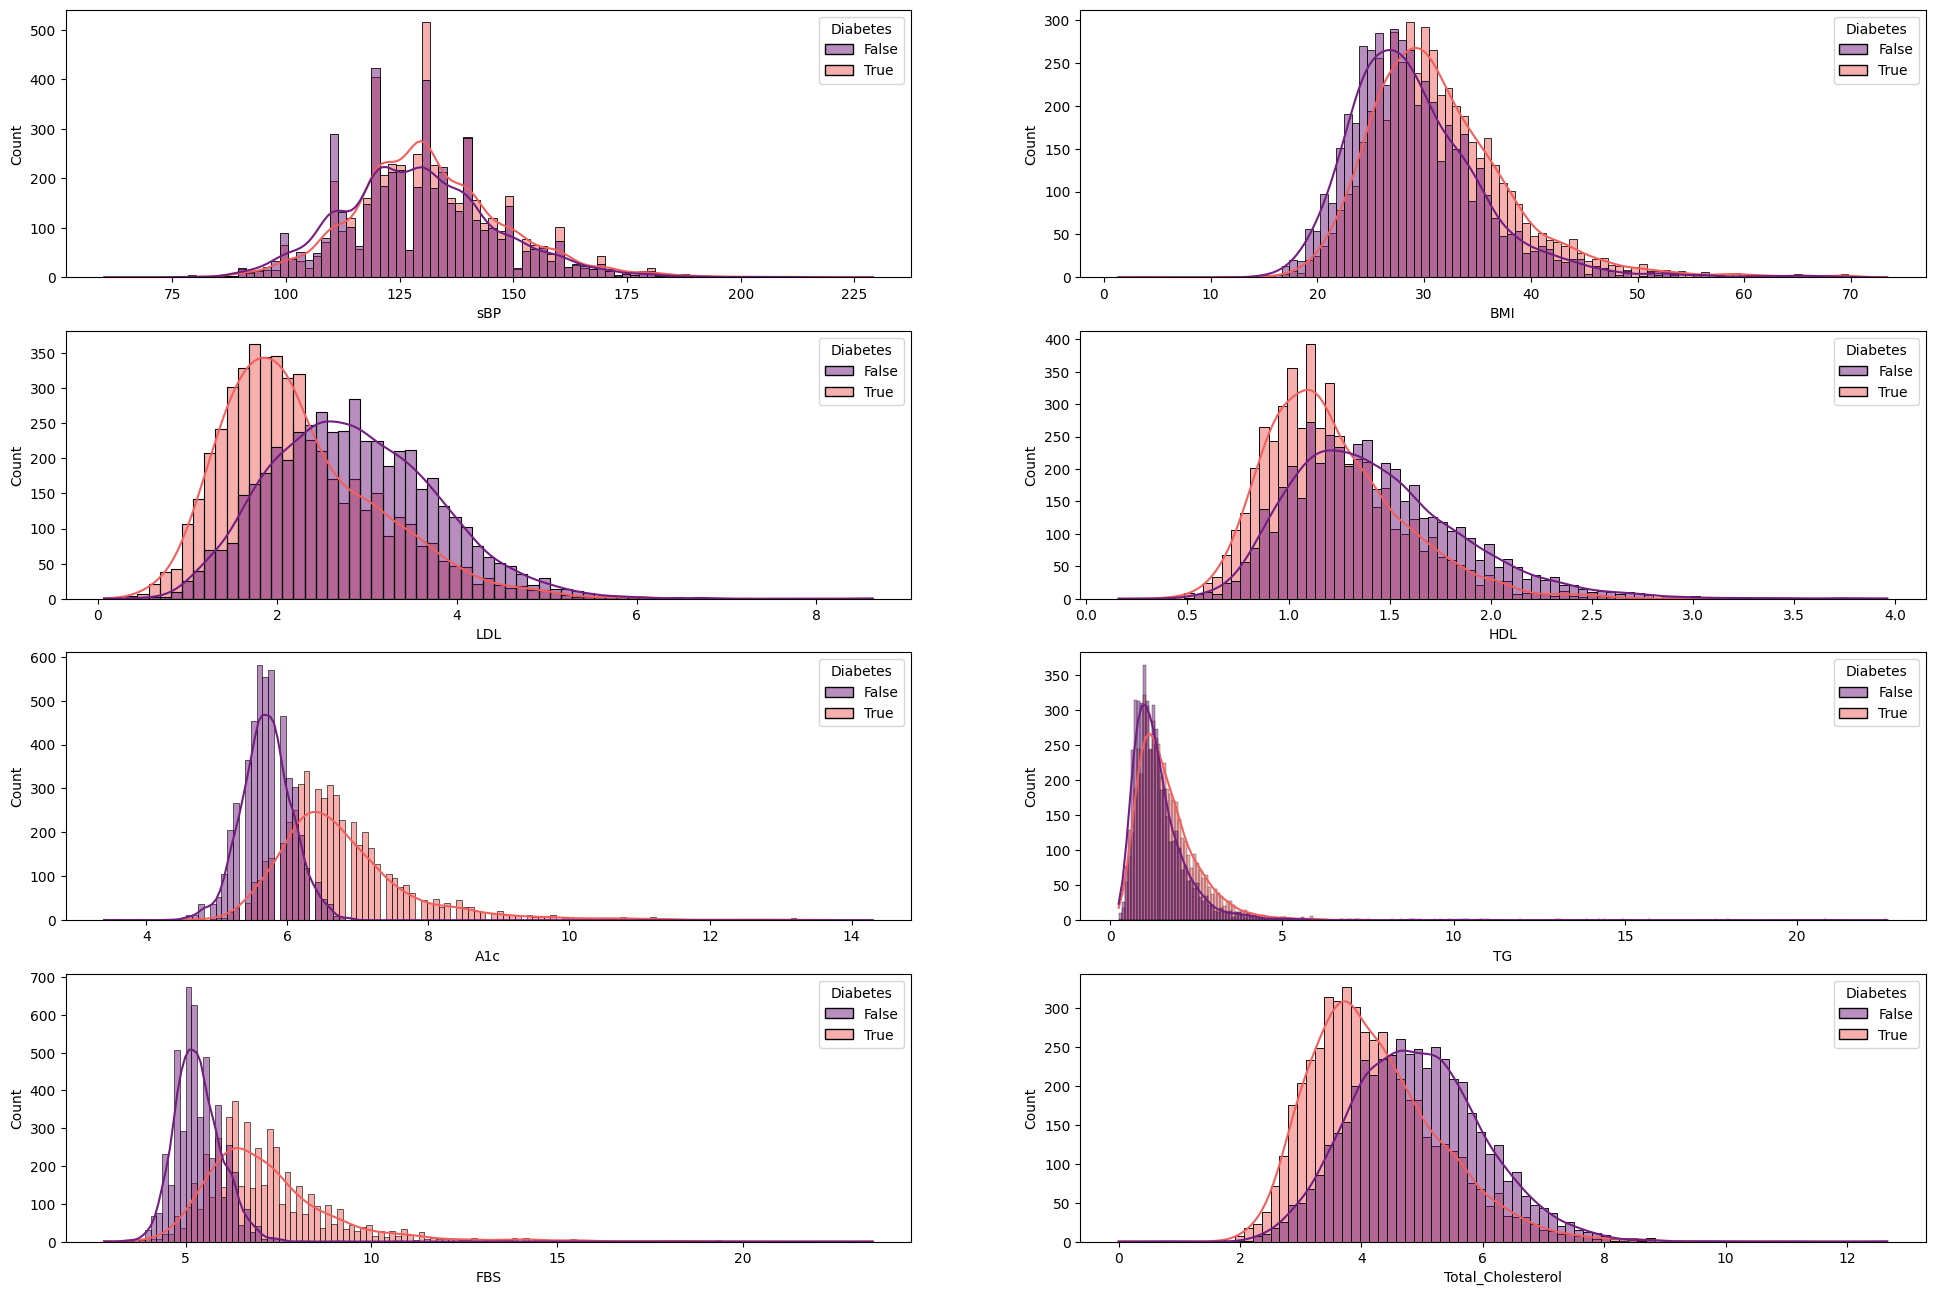

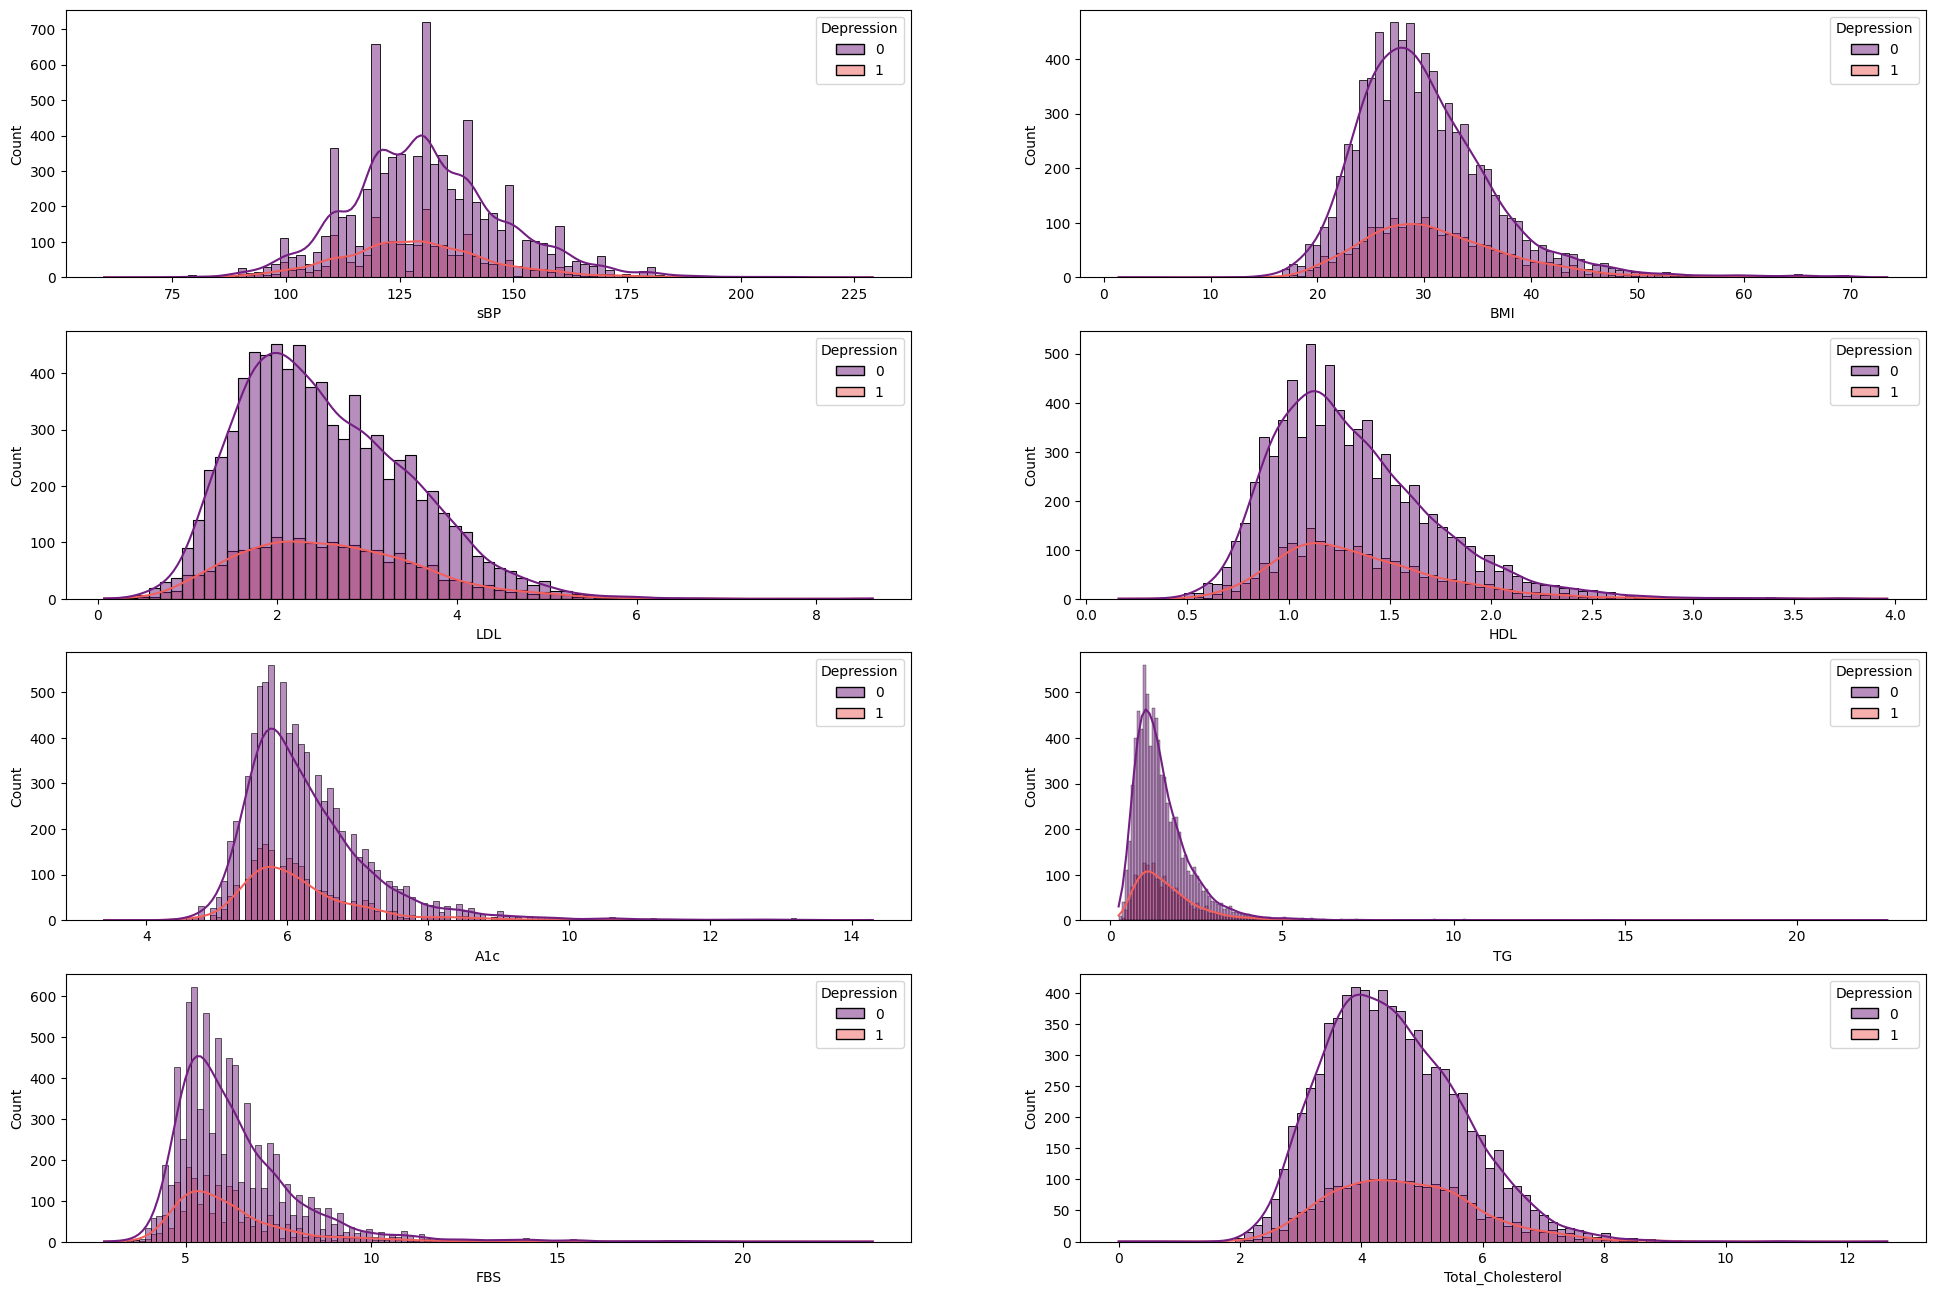

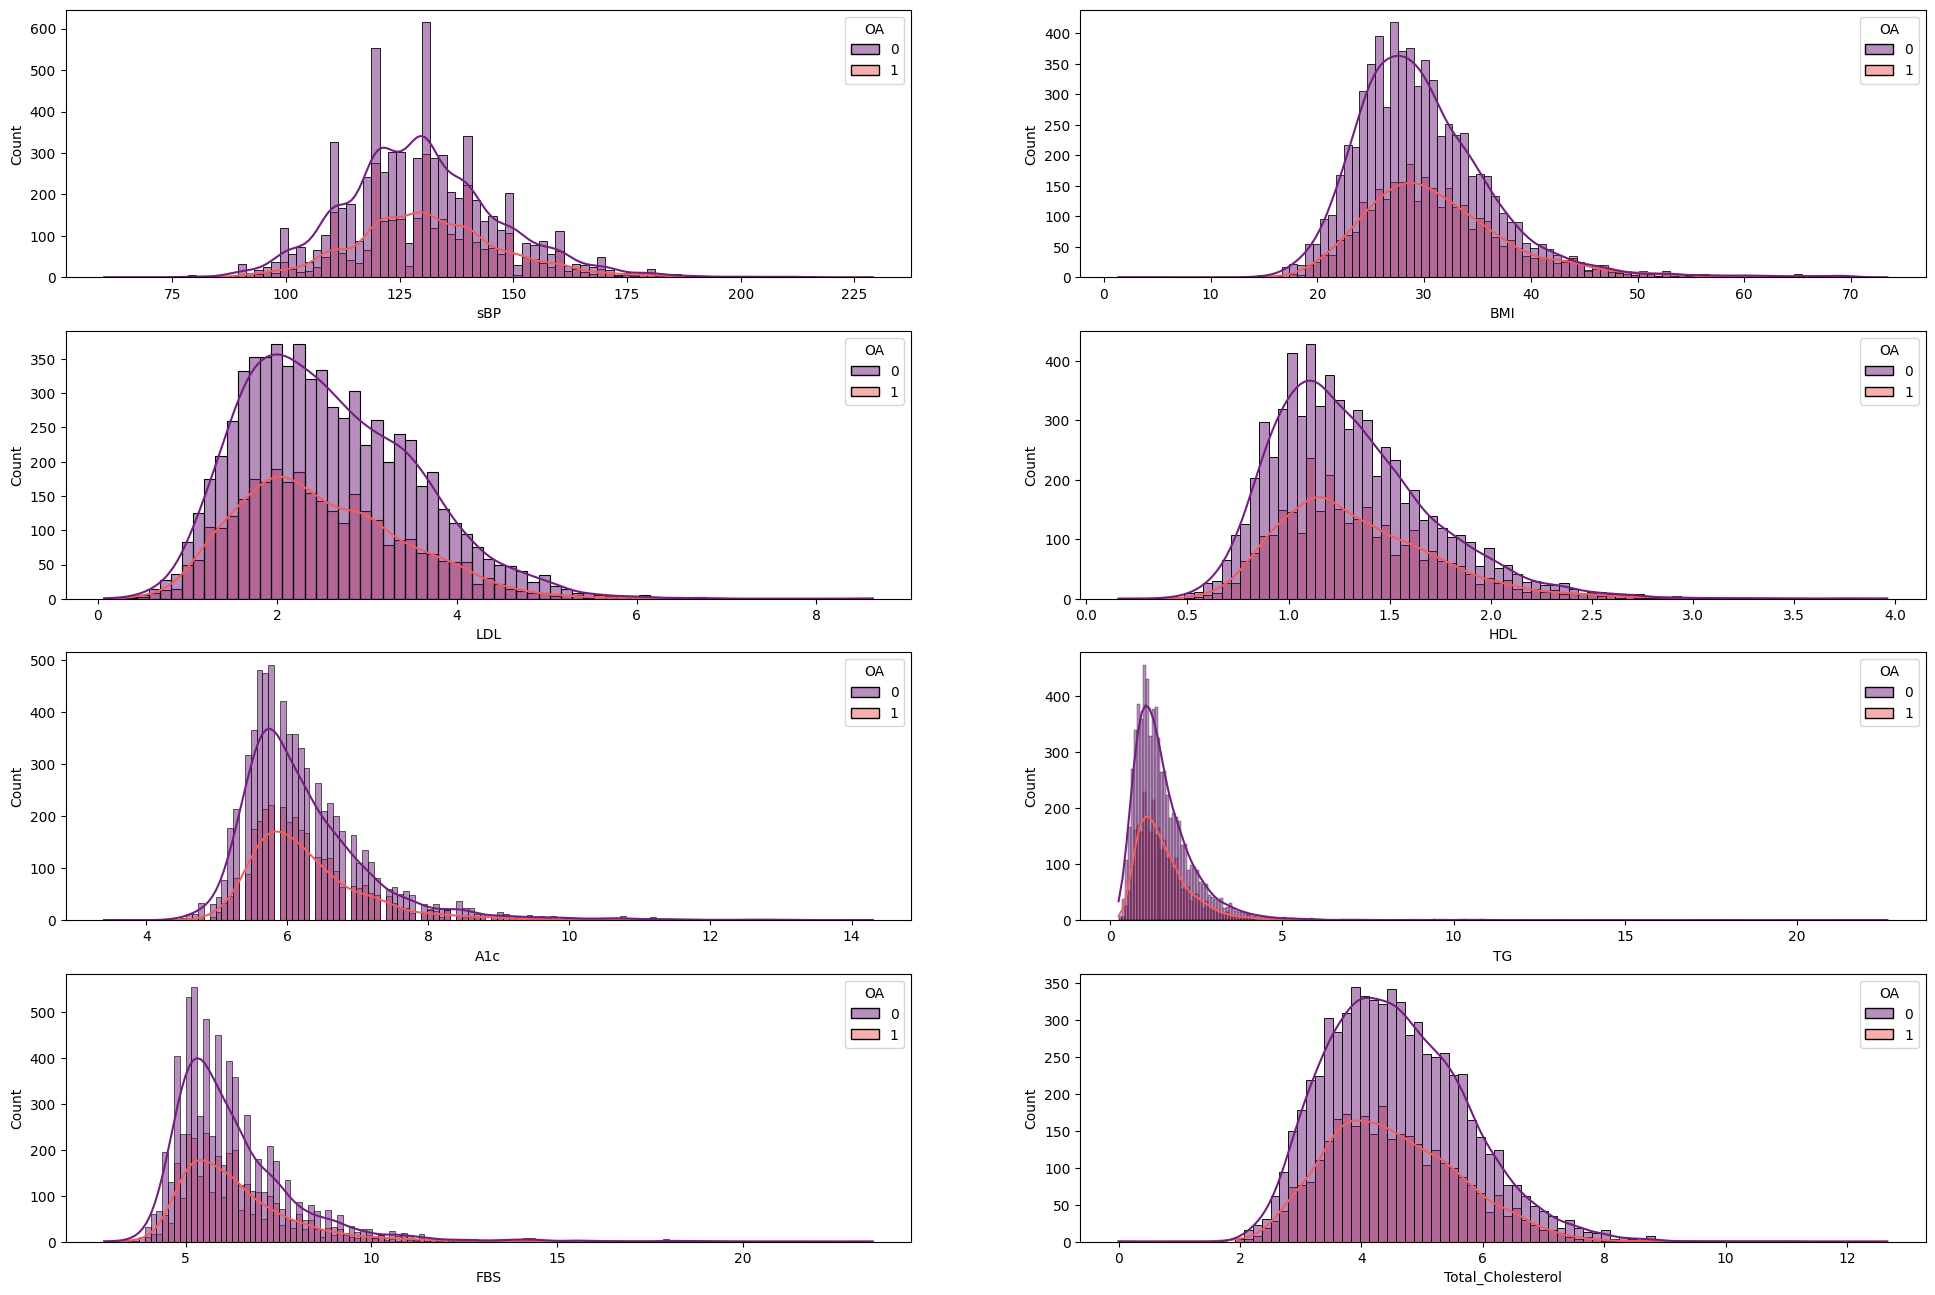

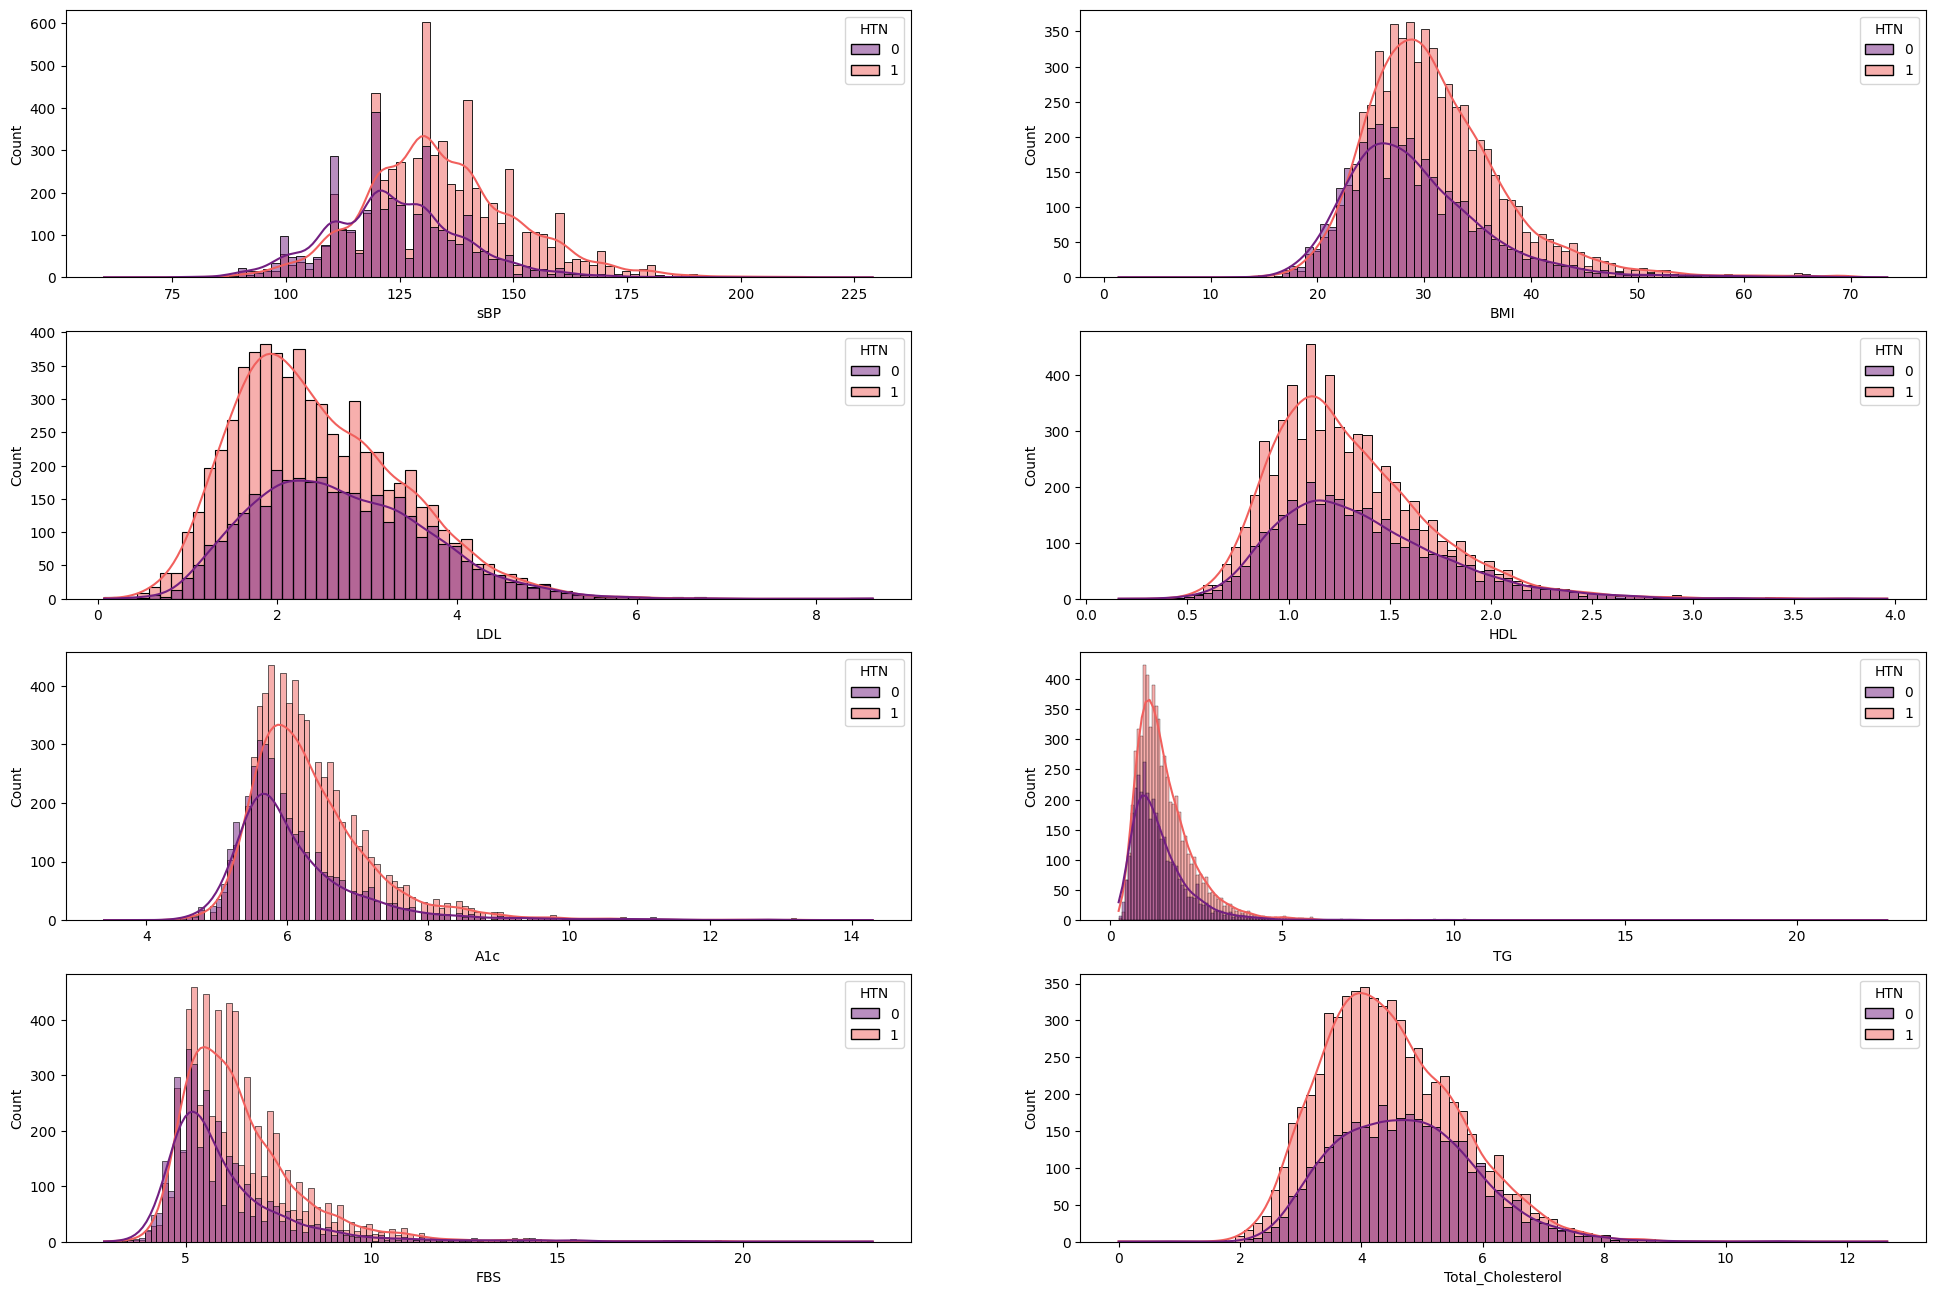

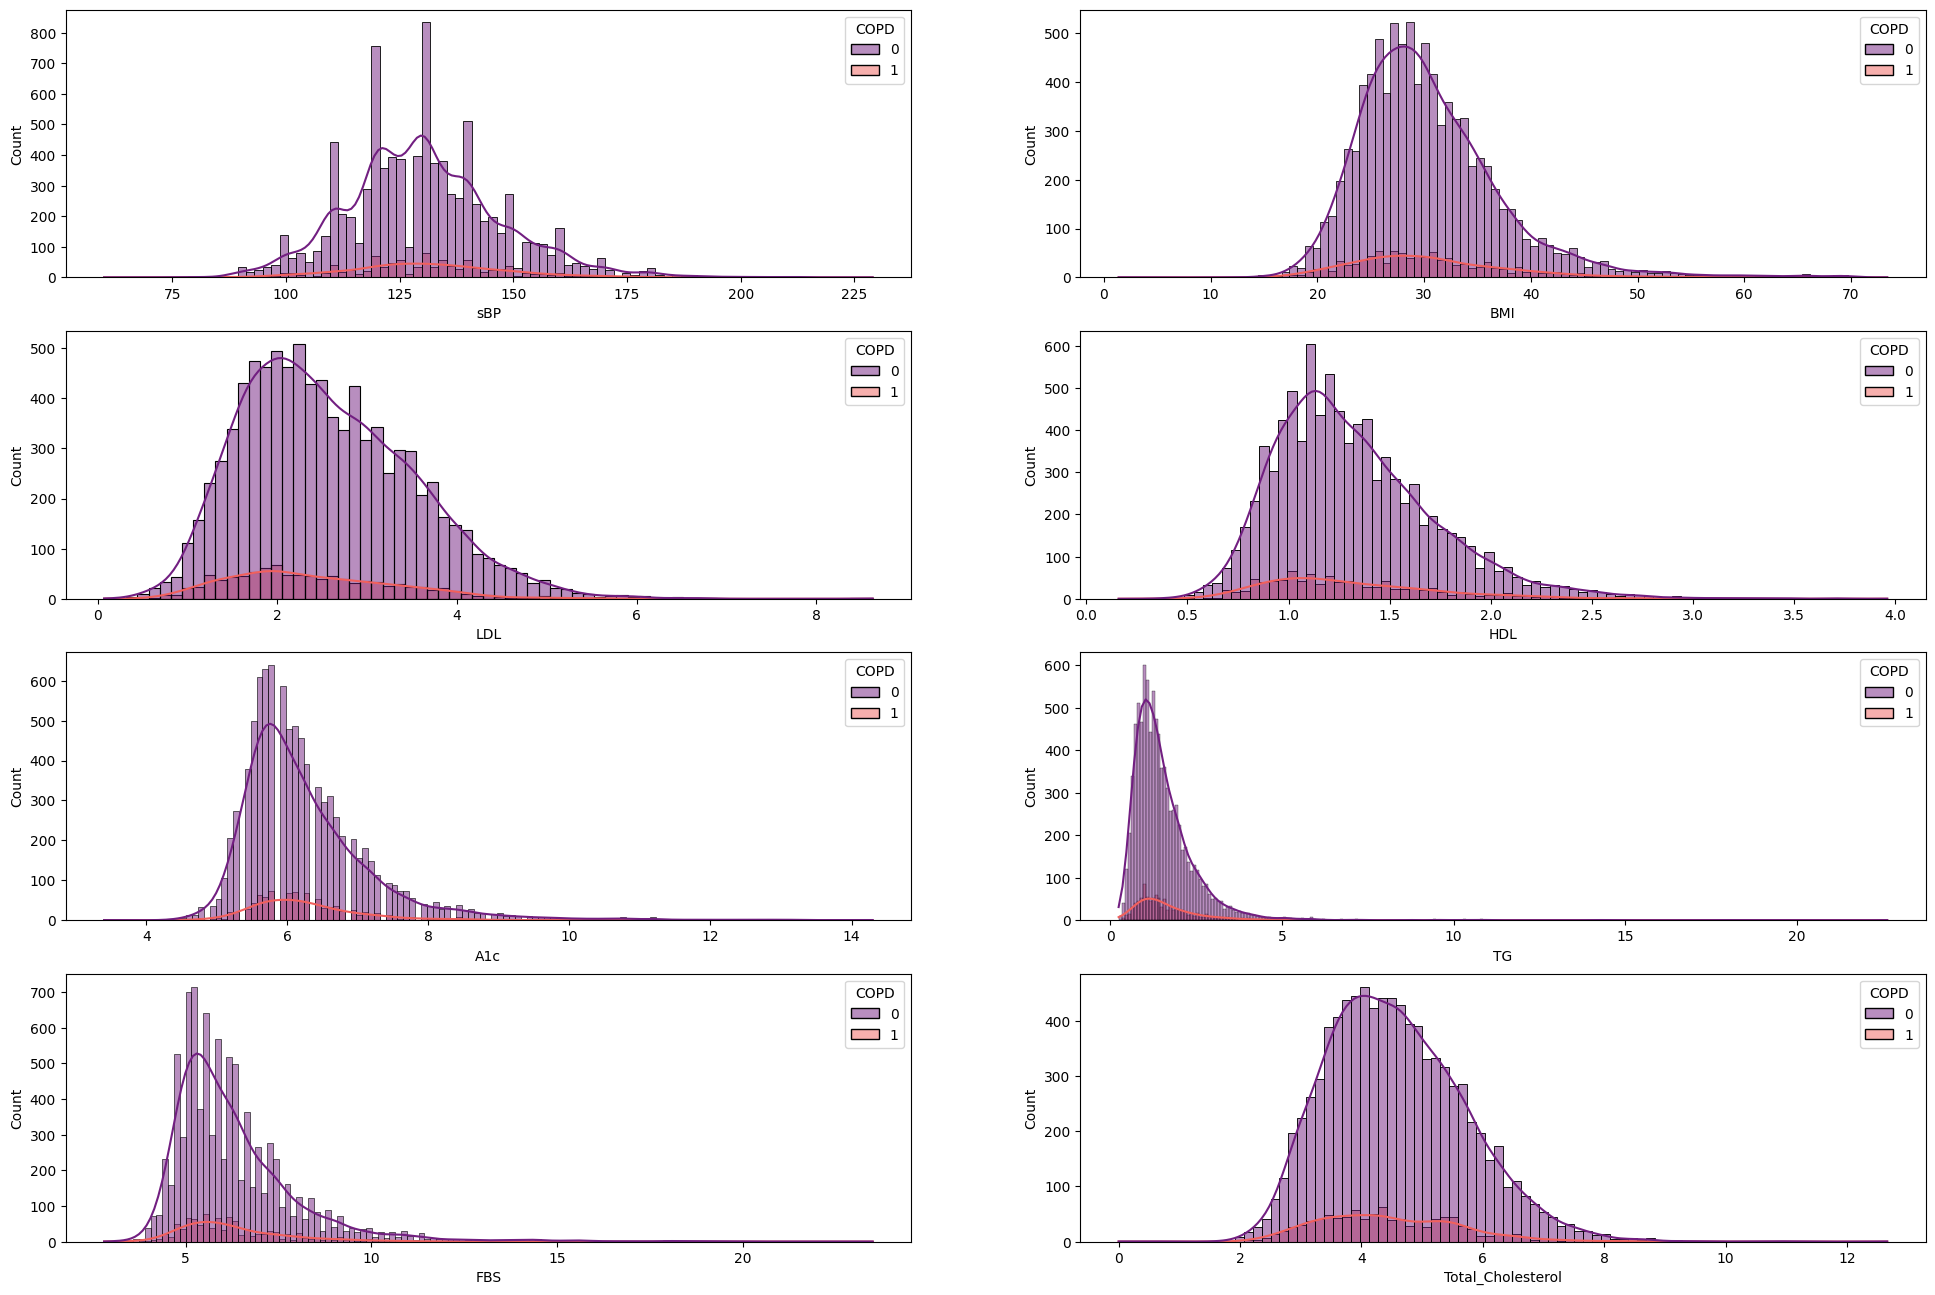

In [ ]:
for j in diagnosis:
  fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(24, 16))
  # Loop over each feature in numerical and multinomial lists
  for i, column in enumerate(numerical_columns):
      # Calculate the position for the subplot; x is the row index and y is the column index
      x = i // 2
      y = i % 2

      # Plot a histogram of the feature split by the 'target' class
      # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
      sns.histplot(dfDiag, x=column, hue=j, kde=True, palette='magma', ax=axs[x][y],)

  # Display all the subplots
  plt.show()

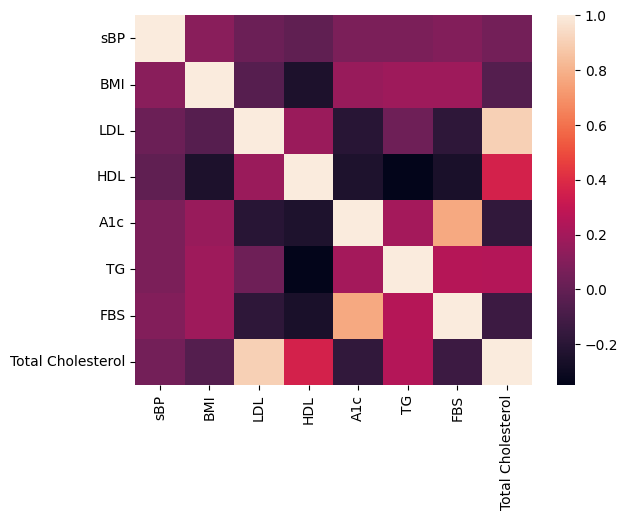

In [28]:

df["Total Cholesterol"] = df["Total_Cholesterol"]

sns.heatmap(df[['sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total Cholesterol']].corr())
plt.show()

In [ ]:
df_s_plot = df_s
df_s_plot['Diabetes'] = df_s_plot['Diabetes'].replace({'True': 1, 'False' : 0})

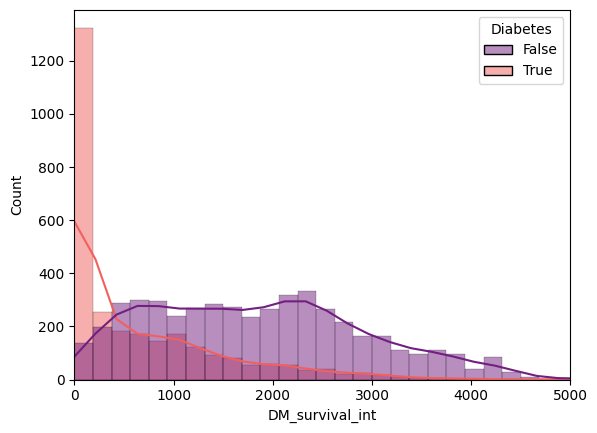

In [ ]:
sns.histplot(df_s_plot, x='DM_survival_int', hue='Diabetes', kde=True, palette='magma')
plt.xlim(0, 5000)
plt.show()

# Handling Missing Data

In [ ]:
print("Missing Value Distribution:\n",df.isnull().sum(),"\n" )

Missing Value Distribution:
 Age_at_Exam            0
sBP                    4
BMI                    0
LDL                   61
HDL                   72
A1c                    0
TG                    53
FBS                    0
Total_Cholesterol    207
Diabetes               0
Depression             0
HTN                    0
OA                     0
COPD                   0
Sex                    0
Total Cholesterol    207
dtype: int64 



In [ ]:
print("Missing Value Distribution:\n",df_s.isnull().sum(),"\n" )

Missing Value Distribution:
 Age_at_Exam            0
sBP                    3
BMI                    0
LDL                   39
HDL                   65
A1c                    0
TG                    48
FBS                    0
Total_Cholesterol    175
Diabetes               0
Depression             0
HTN                    0
OA                     0
COPD                   0
Sex                    0
DM_survival_int        0
dtype: int64 



### Check if MCAR or MAR

1. Add missing indicator where $1 \implies$ missing and $0 \implies$ not missing for each column with missing values
2. Create new dataframe with all indicators and biomakers
3. Create dataframe for each biomarker with missing data
4. Run a logistic regression for each missing indicator to see what variables are significantly associated with the missingness

**Step 1**

In [ ]:
cols = ['sBP','LDL','HDL', 'TG', 'Total_Cholesterol']
df_missing_indicator = df[cols].isnull().astype(int).add_suffix('_indicator')

**Step 2**

In [ ]:
df_with_indicator = pd.concat([df, df_missing_indicator], axis=1)
df_with_indicator.head()

Age_at_Exam    sBP    BMI   LDL   HDL  A1c    TG   FBS  Total_Cholesterol  \
0           87  110.0  23.76  3.78  2.20  6.5  0.62  5.90               6.26   
1           68  122.0  43.79  1.13  0.78  6.2  1.16  6.80               2.43   
2           66  123.0  39.51  1.60  1.00  5.8  1.33  6.30               3.19   
3           62  130.0  35.30   NaN   NaN  5.7   NaN  5.85                NaN   
4           70  140.0  31.00  2.08  1.81  6.2  0.41  4.80               4.08   

   Diabetes  ...  HTN  OA  COPD  Sex  Total Cholesterol  sBP_indicator  \
0         1  ...    0   1     0    0               6.26              0   
1         1  ...    1   1     0    0               2.43              0   
2         1  ...    1   1     0    0               3.19              0   
3         1  ...    1   1     0    1                NaN              0   
4         1  ...    1   1     0    1               4.08              0   

   LDL_indicator  HDL_indicator  TG_indicator  Total_Cholesterol_indicator  
0              0              0             0                            0  
1              0              0             0                            0  
2              0              0             0                            0  
3              1              1             1                            1  
4              0              0             0                            0  

[5 rows x 21 columns]

**Step 3**

In [ ]:
df_sbp = df_with_indicator.drop(['sBP','LDL_indicator', 'HDL_indicator','TG_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_ldl = df_with_indicator.drop(['LDL', 'sBP_indicator', 'HDL_indicator','TG_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_HDL = df_with_indicator.drop(['HDL', 'sBP_indicator', 'LDL_indicator','TG_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_TG = df_with_indicator.drop(['TG', 'sBP_indicator', 'LDL_indicator','HDL_indicator', 'Total_Cholesterol_indicator'], axis=1, inplace=False).dropna()
df_tc = df_with_indicator.drop(['Total_Cholesterol', 'sBP_indicator', 'LDL_indicator','HDL_indicator', 'TG_indicator'], axis=1, inplace=False).dropna()

**Step 4**

In [ ]:
#Sbp
X = df_sbp.drop('sBP_indicator', axis=1, inplace=False)
y = df_sbp['sBP_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

         Current function value: 0.002858
         Iterations: 35


LinAlgError: Singular matrix

No signifcant values $\implies$ MCAR. Can drop missing data

In [ ]:
#LDL
X = df_ldl.drop('LDL_indicator', axis=1, inplace=False)
y = df_ldl['LDL_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.027228
         Iterations 10


LinAlgError: Singular matrix

Signifcant values $\implies$ MAR. Must impute missingness

In [ ]:
#HDL
X = df_HDL.drop('HDL_indicator', axis=1, inplace=False)
y = df_HDL['HDL_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.032713
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          HDL_indicator   No. Observations:                 9699
Model:                          Logit   Df Residuals:                     9684
Method:                           MLE   Df Model:                           14
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                 0.06495
Time:                        16:06:09   Log-Likelihood:                -317.29
converged:                       True   LL-Null:                       -339.33
Covariance Type:            nonrobust   LLR p-value:                 5.743e-05
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.7861      1.984     -1.908      0.056      -7.675       0.103
Age_at_

No signifcant values $\implies$ MCAR. Can drop missing data

In [ ]:
#TG
X = df_TG.drop('TG_indicator', axis=1, inplace=False)
y = df_TG['TG_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.023586
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           TG_indicator   No. Observations:                 9681
Model:                          Logit   Df Residuals:                     9666
Method:                           MLE   Df Model:                           14
Date:                Thu, 01 Feb 2024   Pseudo R-squ.:                 0.05998
Time:                        15:07:57   Log-Likelihood:                -228.34
converged:                       True   LL-Null:                       -242.91
Covariance Type:            nonrobust   LLR p-value:                   0.01001
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.2616      2.359     -2.231      0.026      -9.884      -0.639
Age_at_

Signifcant values $\implies$ MAR. Must impute missingness

In [ ]:
#TC
X = df_tc.drop('Total_Cholesterol_indicator', axis=1, inplace=False)
y = df_tc['Total_Cholesterol_indicator']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.091386
         Iterations 8
                                Logit Regression Results                               
Dep. Variable:     Total_Cholesterol_indicator   No. Observations:                 9830
Model:                                   Logit   Df Residuals:                     9815
Method:                                    MLE   Df Model:                           14
Date:                         Thu, 01 Feb 2024   Pseudo R-squ.:                 0.02586
Time:                                 15:07:59   Log-Likelihood:                -898.32
converged:                                True   LL-Null:                       -922.17
Covariance Type:                     nonrobust   LLR p-value:                 1.474e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.5454      1.037 

Signifcant values $\implies$ MAR. Must impute missingness

### Impute Missing Data

Data is imputed in the Random Forest Model since we only impute based on the `train` data

# Random Forest Model

## Extra necessary functions

In [29]:
def confusionPlot(classes, y_test, y_pred):
  # Plotting the confusion matrix
  plt.figure(figsize=(7,5))
  sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples',
              annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  return plt

def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

## Model Fitting

In [30]:
# Look at records with missing MCAR Data
null_data_sBP = df[df['sBP'].isnull()]
null_data_HDL = df[df['HDL'].isnull()]

# Drop records with missing sBP since MCAR
df = df[df['sBP'].notnull()]

# Drop records with ONLY HDL missing, since HDL is MCAR.
mask = df['HDL'].isnull() & df.drop('HDL', axis=1).notnull().all(axis=1)
df = df[~mask]

In [31]:
df.head()

Age_at_Exam    sBP        BMI   LDL   HDL  A1c    TG  FBS  \
0           65  126.0  31.000000  1.66  1.11  5.4  2.28  5.8   
1           62  135.0  25.846483  2.49  1.37  5.8  1.37  5.4   
2           63  133.0  30.900000  1.65   NaN  6.1  0.76  5.6   
3           51  136.0  56.710775  2.80  1.94  6.0  0.99  6.0   
4           40  123.0  33.067867  2.48  1.17  5.8  1.04  5.2   

   Total_Cholesterol  Diabetes  Depression  HTN  OA  COPD  Sex  \
0               3.81         0           0    0   0     0    0   
1               4.48         0           0    1   0     0    0   
2                NaN         0           0    1   0     1    1   
3               5.19         0           0    0   0     0    0   
4               4.12         0           1    0   0     0    0   

   Total Cholesterol  
0               3.81  
1               4.48  
2                NaN  
3               5.19  
4               4.12

In [32]:
print(df.shape)

(9941, 16)


In [33]:
data = df

data_x = data.drop('Diabetes', axis=1)
data_y = data['Diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
random_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)

# Creating a pipeline which first applies the column transformer preprocessing, then fits the Random Forest model
model = Pipeline([
    ("imputer", IterativeImputer(max_iter=10, random_state=0)),
    ('random_forest', random_forest)
])

# Display the pipeline architecture
model

Pipeline(steps=[('imputer', IterativeImputer(random_state=0)),
                ('random_forest',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', oob_score=True))])

### Grid Search & Hyperparameters

In [34]:
# Setting hyperparameters for Random Forest for the Grid Search.
param_dist = {
    "random_forest__n_estimators" : [100, 200],
    "random_forest__max_depth" : [5, 10, 15, None],
    "random_forest__min_samples_leaf" : [15, 20 ,25, None],
    "random_forest__max_features" : ['sqrt']
}

# Initializing stratified K-fold cross-validation. This ensures each fold has the same proportion of target labels as the whole dataset.
skf = StratifiedKFold(n_splits=5)

# Setting up GridSearchCV to search through the parameter space.
# It will evaluate the model for each combination of hyperparameters provided using stratified K-fold cross-validation.
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Running the GridSearchCV on the training data.
random_search.fit(X_train, y_train)

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

KeyboardInterrupt: 

## Model Fitting with Hyperparameters

In [ ]:
classes = df['Diabetes'].unique()

# Updating the model's hyperparameters with the best parameters identified from the Grid Search.
model = model.set_params(**random_search.best_params_)

# Retraining the model with the updated hyperparameters on the training data.
model = model.fit(X_train, y_train)

In [ ]:
# Predicting the target variable on the train and test sets
y_trainPred = model.predict(X_train)
y_testPred = model.predict(X_test)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_testPred, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_trainPred, y_train)

### Training Set Evaluation

======== Training Set ==========
AUC :  0.8855772194039958
Accuracy :  0.8844315895372233
Confusion Matrix:
[[3545  591]
 [ 328 3488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4136
           1       0.86      0.91      0.88      3816

    accuracy                           0.88      7952
   macro avg       0.89      0.89      0.88      7952
weighted avg       0.89      0.88      0.88      7952



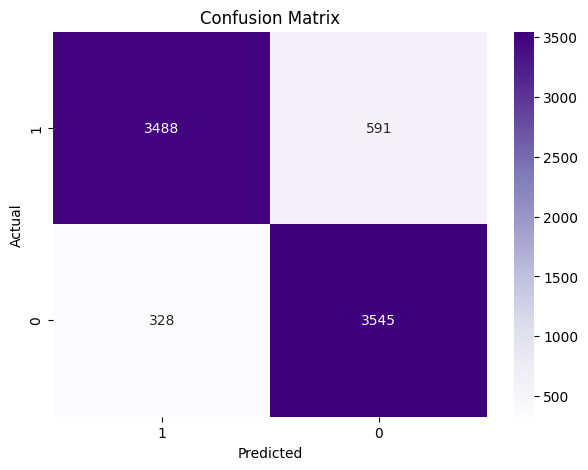

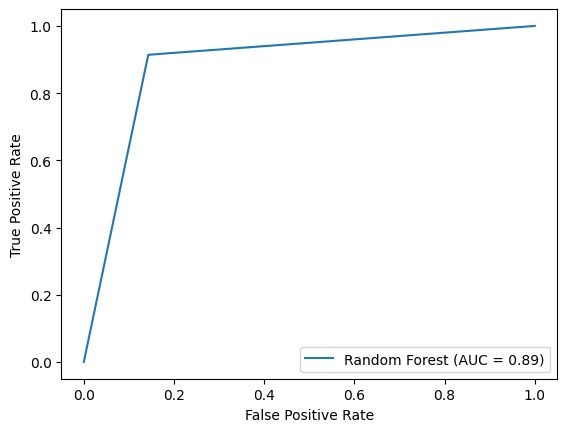

In [ ]:
# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)
confusionPlot(classes, y_train, y_trainPred).show()
# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_trainPred, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()

### Test Set Evaluation

======== Test Set ==========
AUC :  0.8584229916404335
Accuracy :  0.85771744595274
Confusion Matrix:
[[839 177]
 [106 867]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1016
           1       0.83      0.89      0.86       973

    accuracy                           0.86      1989
   macro avg       0.86      0.86      0.86      1989
weighted avg       0.86      0.86      0.86      1989



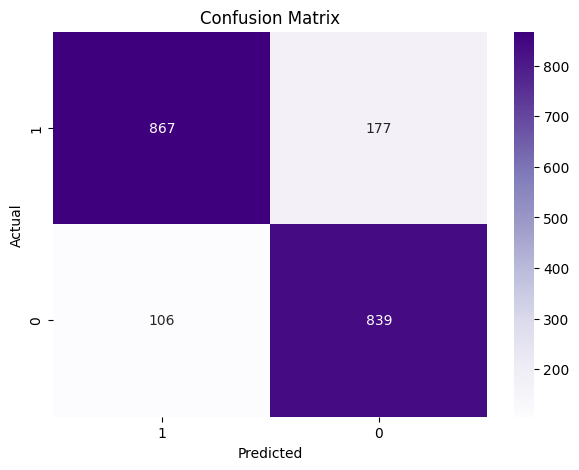

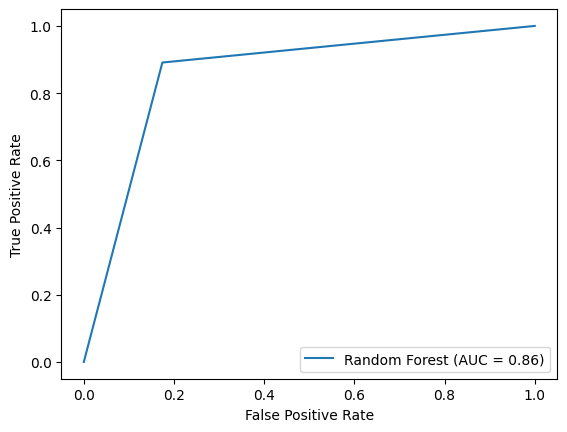

In [ ]:
# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)
confusionPlot(classes, y_test, y_testPred).show()
# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_testPred, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()

## Feature Important

Which features are most important for predicting a diabetes outcome

In [ ]:
features = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol', 'Depression', 'OA', 'HTN', 'COPD', 'Sex']

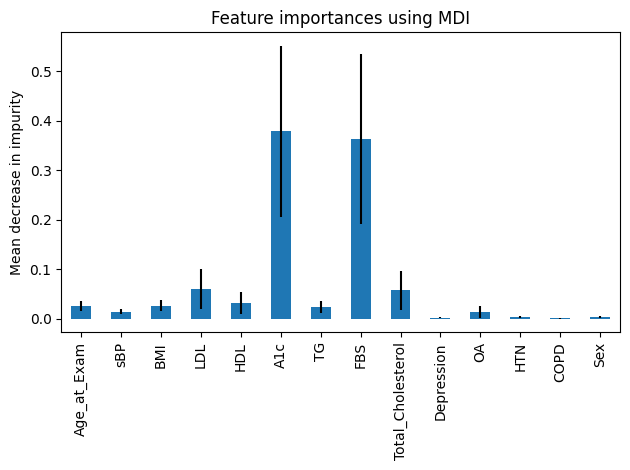

In [ ]:
importances = model.steps[1][1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model.steps[1][1].estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Random Survival Forest

## Data set up

In [35]:
# Look at records with missing MCAR Data
null_data_sBP = df_s[df_s['sBP'].isnull()]
null_data_HDL = df_s[df_s['HDL'].isnull()]

# Drop records with missing sBP since MCAR
df_s = df_s[df_s['sBP'].notnull()]

# Drop records with ONLY HDL missing, since HDL is MCAR.
mask = df_s['HDL'].isnull() & df_s.drop('HDL', axis=1).notnull().all(axis=1)
df_s = df_s[~mask]
df_s.shape

(5853, 16)

In [36]:
# Look at records with missing MCAR Data
null_data_sBP = df_s_p[df_s_p['sBP'].isnull()]
null_data_HDL = df_s_p[df_s_p['HDL'].isnull()]

# Drop records with missing sBP since MCAR
df_s_p = df_s_p[df_s_p['sBP'].notnull()]

# Drop records with ONLY HDL missing, since HDL is MCAR.
mask = df_s_p['HDL'].isnull() & df_s_p.drop('HDL', axis=1).notnull().all(axis=1)
df_s_p = df_s_p[~mask]
df_s_p.shape

(5853, 17)

In [ ]:
print("Missing Value Distribution:\n",df_s.isnull().sum(),"\n" )

Missing Value Distribution:
 Age_at_Exam            0
sBP                    0
BMI                    0
LDL                   39
HDL                   16
A1c                    0
TG                    48
FBS                    0
Total_Cholesterol    175
Diabetes               0
Depression             0
HTN                    0
OA                     0
COPD                   0
Sex                    0
DM_survival_int        0
dtype: int64 



In [ ]:
df_s_p['Patient_ID'].value_counts().sort_values(ascending = False)

4001000000042957    8
4001000000026544    8
4001000000014245    7
8001000805024396    7
4001000000026017    6
                   ..
2001000000041121    1
2001000000069068    1
3005000000112660    1
2001000000071475    1
4001000000045402    1
Name: Patient_ID, Length: 6787, dtype: int64

In [37]:
num_rows, num_cols = df_s.shape
y = list()
for i in range(num_rows):
  yi= (df_s['Diabetes'].iloc[i], df_s['DM_survival_int'].iloc[i])
  y.append(yi)

X = df_s.drop(['DM_survival_int', 'Diabetes'], inplace=False, axis=1)
dt =  np.dtype([('Diabetes', bool), ('DM_survival_int', int)])
y = np.array(y, dtype=dt)

## Split data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

imp = IterativeImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

## Model Fitting

In [39]:
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=150, min_samples_leaf=100, max_depth=15, verbose=2, n_jobs=-1, random_state=42)
rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.8s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100building tree 72 of 100

building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.3s finished


RandomSurvivalForest(max_depth=15, min_samples_leaf=100, min_samples_split=150,
                     n_jobs=-1, random_state=42, verbose=2)

## Results

In [41]:
rsf.score(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.9s finished


0.9158406214168484

In [40]:
rsf.score(X_test, y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


0.9068641906777456

In [ ]:
pred_test = pd.Series(rsf.predict(X_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.9s finished


In [ ]:
surv = rsf.predict_survival_function(X_test, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.unique_times_, s, where="post")
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.grid(True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.4s finished


Error in callback <function flush_figures at 0x7a917aaeda20> (for post_execute):


KeyboardInterrupt: 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.7s finished


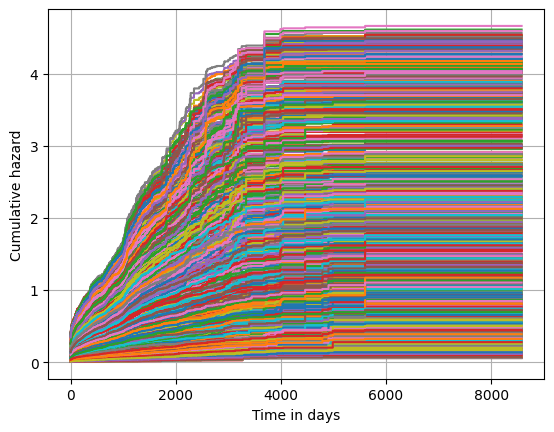

In [ ]:
surv = rsf.predict_cumulative_hazard_function(X_test, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.unique_times_, s, where="post")
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.grid(True)

In [ ]:
surv = rsf.predict_survival_function(X_test, return_array=True)
print(surv.shape)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.3s


(1926, 2424)


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.2s finished


In [ ]:
print(surv)

[[0.97355648 0.97275903 0.97182163 ... 0.69826874 0.69826874 0.69826874]
 [0.98261562 0.98200144 0.98176024 ... 0.85279262 0.85279262 0.85279262]
 [0.65154979 0.63531983 0.62975883 ... 0.01509516 0.01509516 0.01509516]
 ...
 [0.96815217 0.96538288 0.96497376 ... 0.66158698 0.66158698 0.66158698]
 [0.65754713 0.64117238 0.6362565  ... 0.03156833 0.03156833 0.03156833]
 [0.86367213 0.85471858 0.85380514 ... 0.19949204 0.19949204 0.19949204]]


In [ ]:
def find_time_to_50_percent_survival(survival_probabilities, times):

    times_to_50_percent = np.full(survival_probabilities.shape[0], np.nan)

    for i, survival_curve in enumerate(survival_probabilities):
        below_50_percent = np.where(survival_curve < 0.5)[0]
        if below_50_percent.size > 0:
            first_below_50_percent = below_50_percent[0]
            times_to_50_percent[i] = times[first_below_50_percent]

    return times_to_50_percent

times_to_50_percent = find_time_to_50_percent_survival(surv, rsf.unique_times_)

In [ ]:
print(times_to_50_percent.shape)

(1926,)


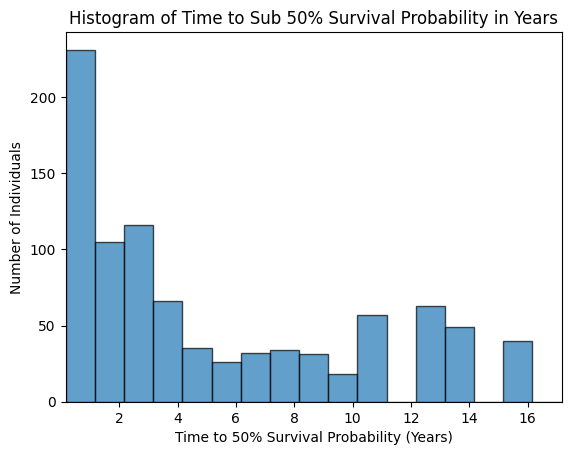

In [ ]:
times_to_50_percent_years = (times_to_50_percent / 365.25)

# Removing NaN values for plotting, check what to do or comment on it
nan_count = np.sum(np.isnan(times_to_50_percent_years))
valid_times_years = times_to_50_percent_years[~np.isnan(times_to_50_percent_years)]
#valid_times_years.to_csv('data.csv', index=False)
np.savetxt('data.csv', valid_times_years, delimiter=',', fmt='%d')
bin_edges = np.arange(np.min(valid_times_years), np.max(valid_times_years) + 2)

plt.hist(valid_times_years, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.xlabel('Time to 50% Survival Probability (Years)')
plt.ylabel('Number of Individuals')
plt.title('Histogram of Time to Sub 50% Survival Probability in Years')
plt.xlim([np.min(bin_edges), np.max(bin_edges)])
plt.show()

In [ ]:
print(nan_count)

1023


In [ ]:
result = permutation_importance(rsf, X_test, y_test, n_repeats=15, random_state=42)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_job

In [ ]:
pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X.columns,
).sort_values(by="importances_mean", ascending=False)

importances_mean  importances_std
A1c                        0.121294         0.005203
FBS                        0.072010         0.004977
LDL                        0.003558         0.000874
Total_Cholesterol          0.003000         0.000757
BMI                        0.000791         0.000498
Age_at_Exam                0.000724         0.000264
HTN                        0.000702         0.000440
HDL                        0.000670         0.000298
TG                         0.000552         0.000537
Sex                        0.000110         0.000073
COPD                       0.000045         0.000032
Depression                 0.000030         0.000074
OA                         0.000008         0.000075
sBP                       -0.000067         0.000099

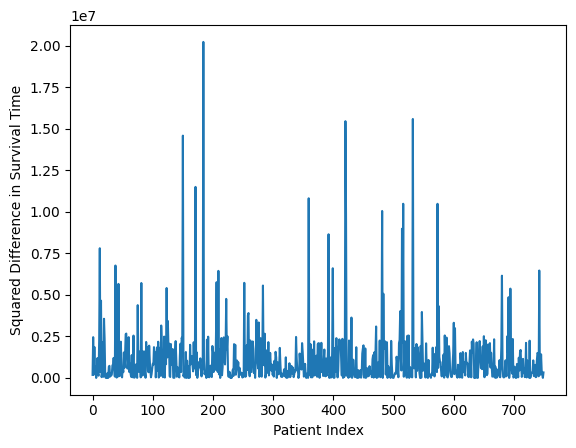

In [ ]:
sqdiff = (y_test['DM_survival_int']-pred_test)**2
sbd = list()
for i in range(len(sqdiff)):
    if y_test['Diabetes'][i] == True:
        sbd.append(sqdiff[i])

plt.plot(range(len(sbd)),sbd)
plt.ylabel("Squared Difference in Survival Time")
plt.xlabel("Patient Index")
plt.show()

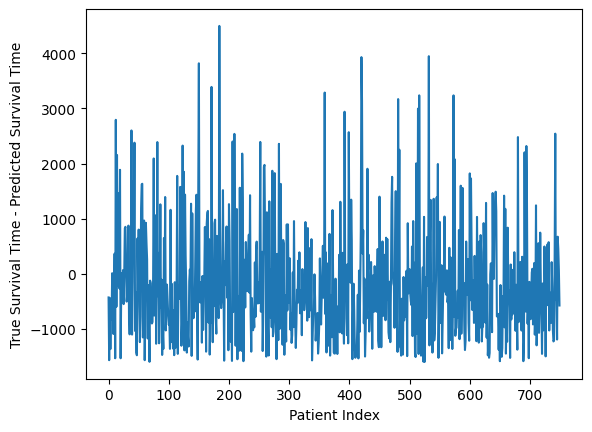

In [ ]:
absdiff = y_test['DM_survival_int']-pred_test
abd = list()
for i in range(len(absdiff)):
    if y_test['Diabetes'][i] == True:
        abd.append(absdiff[i])

plt.plot(range(len(abd)),abd)
plt.ylabel("True Survival Time - Predicted Survival Time")
plt.xlabel("Patient Index")
plt.show()

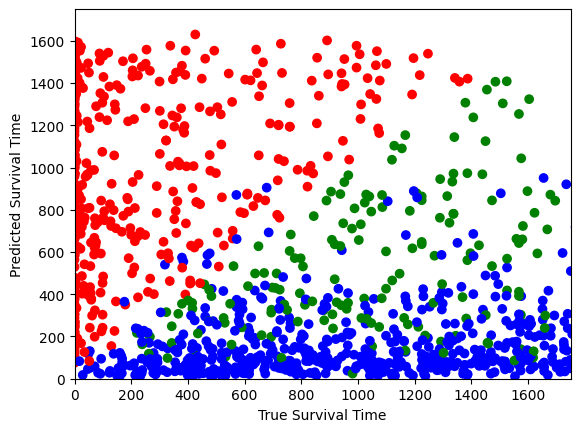

In [ ]:
col = np.where(y_test['Diabetes']==0, 'b', np.where(y_test['DM_survival_int'] < pred_test,'r','g'))

plt.scatter(y_test['DM_survival_int'], pred_test, c=col)
plt.xlabel("True Survival Time")
plt.ylabel("Predicted Survival Time")
ax = plt.gca()
ax.set_xlim([0, 1750])
ax.set_ylim([0, 1750])
plt.show()

In [ ]:
print(statistics.mean(absdiff))
print(statistics.median(absdiff))

print(statistics.mean(sqdiff))
print(statistics.median(sqdiff))

995.3237211912945
905.4570721506042
3125710.9727252917
1400065.0981603088


# NLP Analysis

In [ ]:
# Expand contractions in the 'abtract and discussion' column
df_nlp['abstract_expanded'] = df_nlp['Abstract'].apply(lambda x: contractions.fix(x))
df_nlp['discussion_expanded'] = df_nlp['Discussion'].apply(lambda x: contractions.fix(x))
df_nlp.head()

Title  \
0  Diagnosis and Management of Central Diabetes I...   
1  Prevention of type 2 diabetes: what is the rig...   
2  Combined lifestyle factors and risk of inciden...   
3  Behavioral and Pharmacotherapy Weight Loss Int...   
4  Influence of Lifestyle on Incident Cardiovascu...   

                                            Abstract  \
0  Central diabetes insipidus (CDI) is a clinical...   
1  Introduction: Prevention of type 2 diabetes (T...   
2  Aims/hypothesis\nA healthy lifestyle has been ...   
3  Objective:\nWe conducted this systematic revie...   
4  Background\nEvidence is limited regarding the ...   

                                          Discussion  \
0  The major issue in the investigation and manag...   
1  Two strategies, weight loss via intensive modi...   
2  In this systematic review and meta-analysis of...   
3  Conclusion:\nWe found that behavior-based weig...   
4  In these 2 large prospective cohort studies am...   

                                   abstract_expanded  \
0  Central diabetes insipidus (CDI) is a clinical...   
1  Introduction: Prevention of type 2 diabetes (T...   
2  Aims/hypothesis\nA healthy lifestyle has been ...   
3  Objective:\nWe conducted this systematic revie...   
4  Background\nEvidence is limited regarding the ...   

                                 discussion_expanded  
0  The major issue in the investigation and manag...  
1  Two strategies, weight loss via intensive modi...  
2  In this systematic review and meta-analysis of...  
3  Conclusion:\nWe found that behavior-based weig...  
4  In these 2 large prospective cohort studies am...

## Text data processing

### Standardization

In [ ]:
# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

df_nlp["abstract_expanded"] = df_nlp['abstract_expanded'].str.lower()
df_nlp["discussion_expanded"] = df_nlp['discussion_expanded'].str.lower()

df_nlp["abstract_expanded"] = df_nlp["abstract_expanded"].apply(remove_url)
df_nlp["abstract_expanded"] = df_nlp["abstract_expanded"].apply(remove_special_characters)

df_nlp["discussion_expanded"] = df_nlp["discussion_expanded"].apply(remove_url)
df_nlp["discussion_expanded"] = df_nlp["discussion_expanded"].apply(remove_special_characters)

df_nlp.head()

Title  \
0  Diagnosis and Management of Central Diabetes I...   
1  Prevention of type 2 diabetes: what is the rig...   
2  Combined lifestyle factors and risk of inciden...   
3  Behavioral and Pharmacotherapy Weight Loss Int...   
4  Influence of Lifestyle on Incident Cardiovascu...   

                                            Abstract  \
0  Central diabetes insipidus (CDI) is a clinical...   
1  Introduction: Prevention of type 2 diabetes (T...   
2  Aims/hypothesis\nA healthy lifestyle has been ...   
3  Objective:\nWe conducted this systematic revie...   
4  Background\nEvidence is limited regarding the ...   

                                          Discussion  \
0  The major issue in the investigation and manag...   
1  Two strategies, weight loss via intensive modi...   
2  In this systematic review and meta-analysis of...   
3  Conclusion:\nWe found that behavior-based weig...   
4  In these 2 large prospective cohort studies am...   

                                   abstract_expanded  \
0  central diabetes insipidus cdi is a clinical s...   
1  introduction prevention of type  diabetes td i...   
2  aimshypothesis\na healthy lifestyle has been w...   
3  objective\nwe conducted this systematic review...   
4  background\nevidence is limited regarding the ...   

                                 discussion_expanded  
0  the major issue in the investigation and manag...  
1  two strategies weight loss via intensive modif...  
2  in this systematic review and metaanalysis of ...  
3  conclusion\nwe found that behaviorbased weight...  
4  in these  large prospective cohort studies amo...

### tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

df_nlp['a_tokens'] = df_nlp["abstract_expanded"].apply(tokenize_text)
df_nlp.head()

df_nlp['d_tokens'] = df_nlp['discussion_expanded'].apply(tokenize_text)
df_nlp.head()

Title  \
0  Diagnosis and Management of Central Diabetes I...   
1  Prevention of type 2 diabetes: what is the rig...   
2  Combined lifestyle factors and risk of inciden...   
3  Behavioral and Pharmacotherapy Weight Loss Int...   
4  Influence of Lifestyle on Incident Cardiovascu...   

                                            Abstract  \
0  Central diabetes insipidus (CDI) is a clinical...   
1  Introduction: Prevention of type 2 diabetes (T...   
2  Aims/hypothesis\nA healthy lifestyle has been ...   
3  Objective:\nWe conducted this systematic revie...   
4  Background\nEvidence is limited regarding the ...   

                                          Discussion  \
0  The major issue in the investigation and manag...   
1  Two strategies, weight loss via intensive modi...   
2  In this systematic review and meta-analysis of...   
3  Conclusion:\nWe found that behavior-based weig...   
4  In these 2 large prospective cohort studies am...   

                                   abstract_expanded  \
0  central diabetes insipidus cdi is a clinical s...   
1  introduction prevention of type  diabetes td i...   
2  aimshypothesis\na healthy lifestyle has been w...   
3  objective\nwe conducted this systematic review...   
4  background\nevidence is limited regarding the ...   

                                 discussion_expanded  \
0  the major issue in the investigation and manag...   
1  two strategies weight loss via intensive modif...   
2  in this systematic review and metaanalysis of ...   
3  conclusion\nwe found that behaviorbased weight...   
4  in these  large prospective cohort studies amo...   

                                            a_tokens  \
0  [central, diabetes, insipidus, cdi, is, a, cli...   
1  [introduction, prevention, of, type, diabetes,...   
2  [aimshypothesis, a, healthy, lifestyle, has, b...   
3  [objective, we, conducted, this, systematic, r...   
4  [background, evidence, is, limited, regarding,...   

                                            d_tokens  
0  [the, major, issue, in, the, investigation, an...  
1  [two, strategies, weight, loss, via, intensive...  
2  [in, this, systematic, review, and, metaanalys...  
3  [conclusion, we, found, that, behaviorbased, w...  
4  [in, these, large, prospective, cohort, studie...

### Remove stopwords

In [ ]:
# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df_nlp['a_tokens_no_stop'] = df_nlp['a_tokens'].apply(remove_stop_words)
df_nlp['d_tokens_no_stop'] = df_nlp['d_tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df_nlp[['Abstract', 'a_tokens', 'a_tokens_no_stop',"Discussion","d_tokens","d_tokens_no_stop"]].head()

Abstract  \
0  Central diabetes insipidus (CDI) is a clinical...   
1  Introduction: Prevention of type 2 diabetes (T...   
2  Aims/hypothesis\nA healthy lifestyle has been ...   
3  Objective:\nWe conducted this systematic revie...   
4  Background\nEvidence is limited regarding the ...   

                                            a_tokens  \
0  [central, diabetes, insipidus, cdi, is, a, cli...   
1  [introduction, prevention, of, type, diabetes,...   
2  [aimshypothesis, a, healthy, lifestyle, has, b...   
3  [objective, we, conducted, this, systematic, r...   
4  [background, evidence, is, limited, regarding,...   

                                    a_tokens_no_stop  \
0  [central, diabetes, insipidus, cdi, clinical, ...   
1  [introduction, prevention, type, diabetes, td,...   
2  [aimshypothesis, healthy, lifestyle, widely, r...   
3  [objective, conducted, systematic, review, sup...   
4  [background, evidence, limited, regarding, imp...   

                                          Discussion  \
0  The major issue in the investigation and manag...   
1  Two strategies, weight loss via intensive modi...   
2  In this systematic review and meta-analysis of...   
3  Conclusion:\nWe found that behavior-based weig...   
4  In these 2 large prospective cohort studies am...   

                                            d_tokens  \
0  [the, major, issue, in, the, investigation, an...   
1  [two, strategies, weight, loss, via, intensive...   
2  [in, this, systematic, review, and, metaanalys...   
3  [conclusion, we, found, that, behaviorbased, w...   
4  [in, these, large, prospective, cohort, studie...   

                                    d_tokens_no_stop  
0  [major, issue, investigation, management, cdi,...  
1  [two, strategies, weight, loss, via, intensive...  
2  [systematic, review, metaanalysis, prospective...  
3  [conclusion, found, behaviorbased, weightloss,...  
4  [large, prospective, cohort, studies, among, y...

In [ ]:
df_nlp["a_tokens_no_stop"]

0     [central, diabetes, insipidus, cdi, clinical, ...
1     [introduction, prevention, type, diabetes, td,...
2     [aimshypothesis, healthy, lifestyle, widely, r...
3     [objective, conducted, systematic, review, sup...
4     [background, evidence, limited, regarding, imp...
5     [rapid, outbreak, type, diabetes, one, largest...
6     [unhealthy, diet, recognized, risk, factor, pa...
7     [background, environmental, lifestyle, changes...
8     [background, aims, current, work, aimed, ident...
9     [background, type, diabetes, mellitus, tdm, co...
10    [background, although, many, type, diabetes, m...
11    [past, three, decades, number, people, diabete...
12    [globally, adults, diabetes, mellitus, type, d...
13    [million, people, live, diabetes, worldwide, e...
14    [objectives, diabetic, kidney, disease, dkd, f...
15    [diabetic, nephropathy, dn, major, healthcare,...
16    [adults, diabetes, also, hypertension, patient...
17    [aim, estimated, number, people, worldwide

### Remove no context words

In [ ]:
context_sensitive_stop_words = set(["abstract",'background','objective','conclusion','machine','introduction','diabetes','type diabetes','diabetes mellitus',
                                    'result','T2DM','tdm',"model",'models','data','study','may','results','i','ii','iii','iv','p','n','patient','studies','patients',
                                    'type', 't2dm', 'mellitus', 'using','used'])# add more as we go on

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

df_nlp['a_tokens_no_stop_context'] = df_nlp['a_tokens'].apply(remove_context_sensitive_stop_words)
df_nlp['d_tokens_no_stop_context'] = df_nlp['d_tokens'].apply(remove_context_sensitive_stop_words)

df_nlp[['Abstract','a_tokens','a_tokens_no_stop_context','Discussion','d_tokens','d_tokens_no_stop_context']].head()

Abstract  \
0  Central diabetes insipidus (CDI) is a clinical...   
1  Introduction: Prevention of type 2 diabetes (T...   
2  Aims/hypothesis\nA healthy lifestyle has been ...   
3  Objective:\nWe conducted this systematic revie...   
4  Background\nEvidence is limited regarding the ...   

                                            a_tokens  \
0  [central, diabetes, insipidus, cdi, is, a, cli...   
1  [introduction, prevention, of, type, diabetes,...   
2  [aimshypothesis, a, healthy, lifestyle, has, b...   
3  [objective, we, conducted, this, systematic, r...   
4  [background, evidence, is, limited, regarding,...   

                            a_tokens_no_stop_context  \
0  [central, insipidus, cdi, clinical, syndrome, ...   
1  [prevention, td, important, reduce, suffering,...   
2  [aimshypothesis, healthy, lifestyle, widely, r...   
3  [conducted, systematic, review, support, yous,...   
4  [evidence, limited, regarding, impact, healthy...   

                                          Discussion  \
0  The major issue in the investigation and manag...   
1  Two strategies, weight loss via intensive modi...   
2  In this systematic review and meta-analysis of...   
3  Conclusion:\nWe found that behavior-based weig...   
4  In these 2 large prospective cohort studies am...   

                                            d_tokens  \
0  [the, major, issue, in, the, investigation, an...   
1  [two, strategies, weight, loss, via, intensive...   
2  [in, this, systematic, review, and, metaanalys...   
3  [conclusion, we, found, that, behaviorbased, w...   
4  [in, these, large, prospective, cohort, studie...   

                            d_tokens_no_stop_context  
0  [major, issue, investigation, management, cdi,...  
1  [two, strategies, weight, loss, via, intensive...  
2  [systematic, review, metaanalysis, prospective...  
3  [found, behaviorbased, weightloss, interventio...  
4  [large, prospective, cohort, among, yous, men,...

In [ ]:
df_nlp["a_tokens_no_stop_context"]

0     [central, insipidus, cdi, clinical, syndrome, ...
1     [prevention, td, important, reduce, suffering,...
2     [aimshypothesis, healthy, lifestyle, widely, r...
3     [conducted, systematic, review, support, yous,...
4     [evidence, limited, regarding, impact, healthy...
5     [rapid, outbreak, one, largest, public, health...
6     [unhealthy, diet, recognized, risk, factor, pa...
7     [environmental, lifestyle, changes, addition, ...
8     [aims, current, work, aimed, identify, predomi...
9     [comprises, vast, majority, cases, adults, ala...
10    [although, many, risk, factors, identified, li...
11    [past, three, decades, number, people, doubled...
12    [globally, adults, asia, epicentre, global, ep...
13    [million, people, live, worldwide, estimated, ...
14    [objectives, diabetic, kidney, disease, dkd, f...
15    [diabetic, nephropathy, dn, major, healthcare,...
16    [adults, also, hypertension, hypertension, alo...
17    [aim, estimated, number, people, worldwide

## Create word cloud

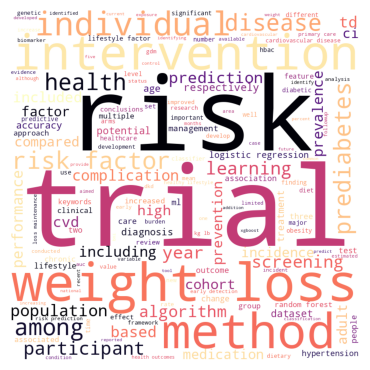

In [ ]:
#for the abstract
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df_nlp['a_tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

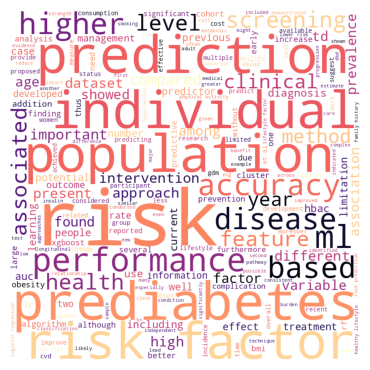

In [ ]:
#for the discussion:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df_nlp['d_tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Lemmatization

In [ ]:
# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df_nlp['a_lemmatized'] = df_nlp['a_tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)
df_nlp['d_lemmatized'] = df_nlp['d_tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_nlp['a_lemmatized'].head()

0    [central, insipidus, cdi, clinical, syndrome, ...
1    [prevention, td, important, reduce, suffer, he...
2    [aimshypothesis, healthy, lifestyle, widely, r...
3    [conduct, systematic, review, support, yous, p...
4    [evidence, limit, regard, impact, healthy, lif...
Name: a_lemmatized, dtype: object

### Final word clouds

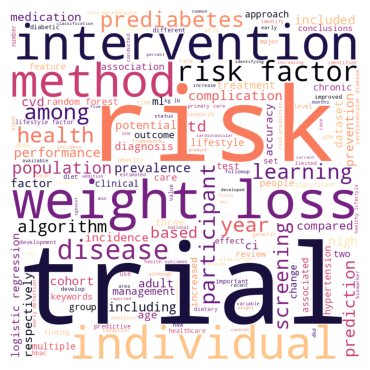

In [ ]:
#word cloud for abstract again
all_tokens = sum(df_nlp['a_tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

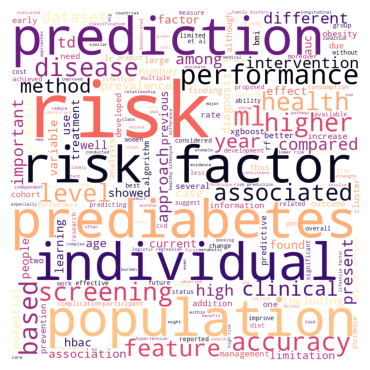

In [ ]:
all_tokens = sum(df_nlp['d_tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Embedding using glove

In [ ]:
# Load pre-trained GloVe model
glove_model = api.load('glove-wiki-gigaword-100')  # GloVe model trained on Wikipedia 2014 + Gigaword 5

# Example function to vectorize a list of tokens using the GloVe model
def vectorize(tokens):
    # Filter out tokens not in the model's vocabulary
    tokens = [token for token in tokens if token in glove_model.key_to_index]

    # If no words in the tweet are in the model's vocabulary, return a zero vector
    if len(tokens) == 0:
        return np.zeros(glove_model.vector_size)

    # Compute the mean of the word vectors for the tokens
    word_vectors = [glove_model[token] for token in tokens]
    return np.mean(word_vectors, axis=0)

def glove_words(tokens):
  final_tokens = [token for token in tokens if token in glove_model.key_to_index]
  return final_tokens


# Apply the vectorization to each row's tokens
df_nlp['a_embedding'] = df_nlp['a_lemmatized'].apply(vectorize)
df_nlp['a_glove_words'] = df_nlp['a_lemmatized'].apply(glove_words)

df_nlp['d_embedding'] = df_nlp['d_lemmatized'].apply(vectorize)
df_nlp['d_glove_words'] = df_nlp['d_lemmatized'].apply(glove_words)

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
df_nlp[['a_lemmatized','a_glove_words']].apply(len)

a_lemmatized     50
a_glove_words    50
dtype: int64

In [ ]:
df_nlp.head()

Title  \
0  Diagnosis and Management of Central Diabetes I...   
1  Prevention of type 2 diabetes: what is the rig...   
2  Combined lifestyle factors and risk of inciden...   
3  Behavioral and Pharmacotherapy Weight Loss Int...   
4  Influence of Lifestyle on Incident Cardiovascu...   

                                            Abstract  \
0  Central diabetes insipidus (CDI) is a clinical...   
1  Introduction: Prevention of type 2 diabetes (T...   
2  Aims/hypothesis\nA healthy lifestyle has been ...   
3  Objective:\nWe conducted this systematic revie...   
4  Background\nEvidence is limited regarding the ...   

                                          Discussion  \
0  The major issue in the investigation and manag...   
1  Two strategies, weight loss via intensive modi...   
2  In this systematic review and meta-analysis of...   
3  Conclusion:\nWe found that behavior-based weig...   
4  In these 2 large prospective cohort studies am...   

                                   abstract_expanded  \
0  central diabetes insipidus cdi is a clinical s...   
1  introduction prevention of type  diabetes td i...   
2  aimshypothesis\na healthy lifestyle has been w...   
3  objective\nwe conducted this systematic review...   
4  background\nevidence is limited regarding the ...   

                                 discussion_expanded  \
0  the major issue in the investigation and manag...   
1  two strategies weight loss via intensive modif...   
2  in this systematic review and metaanalysis of ...   
3  conclusion\nwe found that behaviorbased weight...   
4  in these  large prospective cohort studies amo...   

                                            a_tokens  \
0  [central, diabetes, insipidus, cdi, is, a, cli...   
1  [introduction, prevention, of, type, diabetes,...   
2  [aimshypothesis, a, healthy, lifestyle, has, b...   
3  [objective, we, conducted, this, systematic, r...   
4  [background, evidence, is, limited, regarding,...   

                                            d_tokens  \
0  [the, major, issue, in, the, investigation, an...   
1  [two, strategies, weight, loss, via, intensive...   
2  [in, this, systematic, review, and, metaanalys...   
3  [conclusion, we, found, that, behaviorbased, w...   
4  [in, these, large, prospective, cohort, studie...   

                                    a_tokens_no_stop  \
0  [central, diabetes, insipidus, cdi, clinical, ...   
1  [introduction, prevention, type, diabetes, td,...   
2  [aimshypothesis, healthy, lifestyle, widely, r...   
3  [objective, conducted, systematic, review, sup...   
4  [background, evidence, limited, regarding, imp...   

                                    d_tokens_no_stop  \
0  [major, issue, investigation, management, cdi,...   
1  [two, strategies, weight, loss, via, intensive...   
2  [systematic, review, metaanalysis, prospective...   
3  [conclusion, found, behaviorbased, weightloss,...   
4  [large, prospective, cohort, studies, among, y...   

                            a_tokens_no_stop_context  \
0  [central, insipidus, cdi, clinical, syndrome, ...   
1  [prevention, td, important, reduce, suffering,...   
2  [aimshypothesis, healthy, lifestyle, widely, r...   
3  [conducted, systematic, review, support, yous,...   
4  [evidence, limited, regarding, impact, healthy...   

                            d_tokens_no_stop_context  \
0  [major, issue, investigation, management, cdi,...   
1  [two, strategies, weight, loss, via, intensive...   
2  [systematic, review, metaanalysis, prospective...   
3  [found, behaviorbased, weightloss, interventio...   
4  [large, prospective, cohort, among, yous, men,...   

                                        a_lemmatized  \
0  [central, insipidus, cdi, clinical, syndrome, ...   
1  [prevention, td, important, reduce, suffer, he...   
2  [aimshypothesis, healthy, lifestyle, widely, r...   
3  [conduct, systematic, review, support, yous, p...   
4  [evidence, limit, regard, impact, healthy, lif...   

   

### Graph the word themes

In [ ]:
def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

In [ ]:
def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

**Abstract**

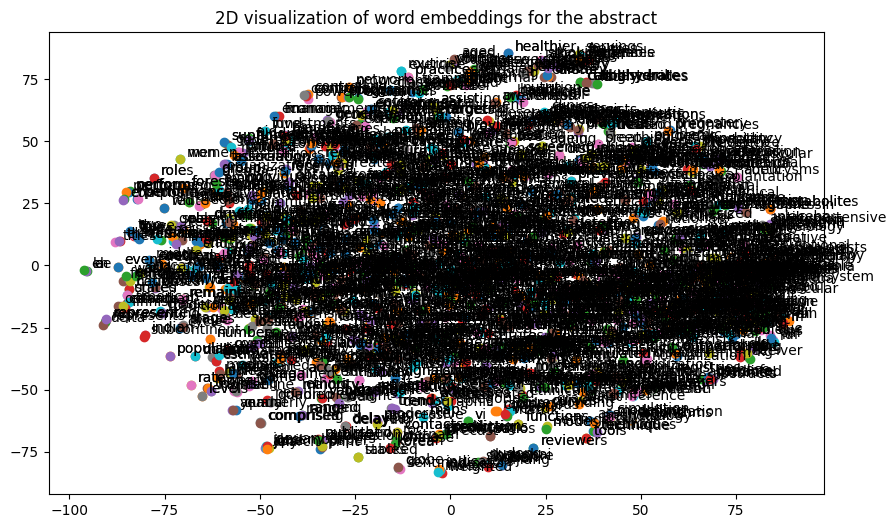

In [ ]:
a_all_tokens = sum(df_nlp['a_tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
a_text = ' '.join(a_all_tokens)

a_unique_terms = list(set(a_text.split()))

# Filter out words not in the model
a_filtered_words = [word for word in a_unique_terms if word in glove_model]

# Extracting embeddings for filtered words
a_word_vectors = np.array([glove_model[word] for word in a_filtered_words])

# Reducing dimensions with t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
a_words_reduced = tsne.fit_transform(a_word_vectors)

# Plotting
plt.figure(figsize=(10, 6))
for i, word in enumerate(a_filtered_words):
    plt.scatter(a_words_reduced[i, 0], a_words_reduced[i, 1])
    plt.annotate(word, xy=(a_words_reduced[i, 0], a_words_reduced[i, 1]), xytext=(5, 2), textcoords='offset points')
plt.title("2D visualization of word embeddings for the abstract")
plt.show()

*K-Means Clustering*

In [ ]:
# Perform K-means clustering with the reduced vecors from the earlier code
num_clusters = 10
a_kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(a_words_reduced)
a_labels = a_kmeans.labels_
a_feature_words = a_kmeans.cluster_centers_

In [ ]:
#interesting_clusters = [1, 3, 6, 7, 10, 11, 15, 20, 19, 24, 29]
embeddings = a_words_reduced
def plot_embedding_space(embedding_matrix, labels, clusters_to_plot=[1, 2, 3, 4, 5]):
    fig = go.Figure()

    for cluster_idx in clusters_to_plot:
        cluster_indices = np.where(labels == cluster_idx - 1)[0]
        cluster_points = embeddings[cluster_indices]
        cluster_words = [a_filtered_words[i] for i in cluster_indices]
       # cluster_words_counts = [cluster_words[i] for i in a_counts['Word']]

        scatter = go.Scatter(
            x=cluster_points[:, 0],
            y=cluster_points[:, 1],
            mode='markers',
            text=cluster_words,
            textposition='top center',
            marker=dict(size=8, opacity=0.8),#cluster_words_counts['Frequency']
            name=f'Cluster {cluster_idx}',
        )
        fig.add_trace(scatter)

    # Customize the plot
    fig.update_layout(
        title='2D Word Embeddings with K-means Clustering for the abstract',
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        legend_title='Clusters',
    )

    # Show the plot
    fig.show()

# Call the function with the desired list of clusters to plot
plot_embedding_space(a_words_reduced,a_labels, clusters_to_plot=[1,2,3,4,5,6,7,8,9,10,11,12])#,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30

**Discussion**

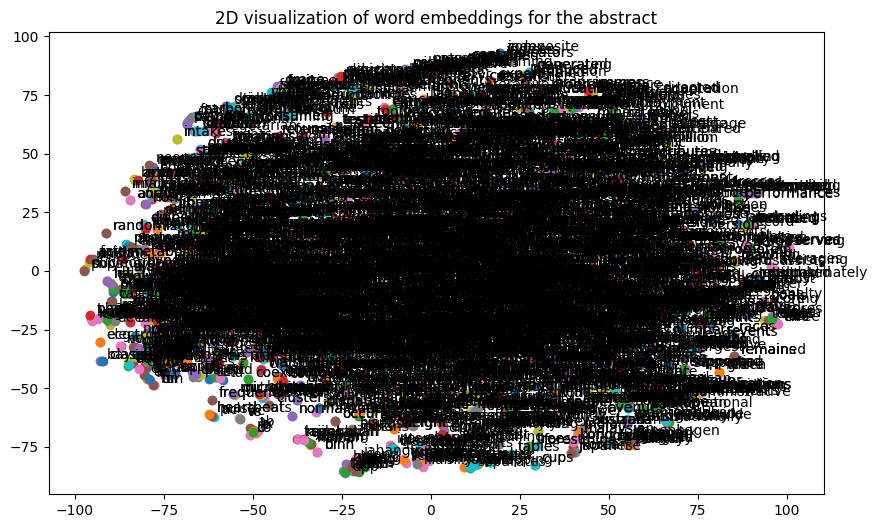

In [ ]:
d_all_tokens = sum(df_nlp['d_tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
d_text = ' '.join(d_all_tokens)

d_unique_terms = list(set(d_text.split()))

# Filter out words not in the model
d_filtered_words = [word for word in d_unique_terms if word in glove_model]

# Extracting embeddings for filtered words
d_word_vectors = np.array([glove_model[word] for word in d_filtered_words])

# Reducing dimensions with t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
d_words_reduced = tsne.fit_transform(d_word_vectors)

# Plotting
plt.figure(figsize=(10, 6))
for i, word in enumerate(d_filtered_words):
    plt.scatter(d_words_reduced[i, 0], d_words_reduced[i, 1])
    plt.annotate(word, xy=(d_words_reduced[i, 0], d_words_reduced[i, 1]), xytext=(5, 2), textcoords='offset points')
plt.title("2D visualization of word embeddings for the abstract")
plt.show()

*K-Means Clustering*

In [ ]:
# Perform K-means clustering with the reduced vecors from the earlier code
num_clusters = 5
d_kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(d_word_vectors)
d_labels = d_kmeans.labels_
d_feature_words = d_kmeans.cluster_centers_

In [ ]:
embeddings = d_words_reduced
def plot_embedding_space(embedding_matrix, labels, clusters_to_plot=[1, 2, 3, 4, 5]):
    fig = go.Figure()

    for cluster_idx in clusters_to_plot:
        cluster_indices = np.where(labels == cluster_idx - 1)[0]
        cluster_points = embeddings[cluster_indices]
        cluster_words = [d_filtered_words[i] for i in cluster_indices]
       # cluster_words_counts = [cluster_words[i] for i in a_counts['Word']]

        scatter = go.Scatter(
            x=cluster_points[:, 0],
            y=cluster_points[:, 1],
            mode='markers',
            text=cluster_words,
            textposition='top center',
            marker=dict(size=8, opacity=0.8),#cluster_words_counts['Frequency']
            name=f'Cluster {cluster_idx}',
        )
        fig.add_trace(scatter)

    # Customize the plot
    fig.update_layout(
        title='2D Word Embeddings with K-means (full dim) Clustering for the Discussion Text Analysis',
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        legend_title='Clusters',
    )

    # Show the plot
    fig.show()

# Call the function with the desired list of clusters to plot
plot_embedding_space(d_words_reduced,d_labels, clusters_to_plot=[1,2,3,4,5])#,4,5,6,7,8,9,10,11,12,13,14,15,16])#,17,18,19,20,21,22,23,24,25,26,27,28,29,30